<a href="https://colab.research.google.com/github/BianchiLuca28/FHNW-BI-LMS/blob/main/notebooks/EDA/eda_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expoloratory Data Analysis

In this notebook, we analyze the dataset (without performing any kind of preprocessing).

All identified problems will then be later addressed in the preprocessing of the model.

# Imports

In [23]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and tools
from sklearn.ensemble import RandomForestClassifier

# Data preprocessing and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Importing dataset

Importing the dataset from the online source in Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change with your location to read the dataset from
folder_path = "/content/drive/MyDrive/__Shared/BI"

In [4]:
df = pd.read_csv(folder_path + "/preprocessed_flattened_dataset.csv")

<ipython-input-4-da48d673589e>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder_path + "/preprocessed_flattened_dataset.csv")


In [5]:
# # When working locally
# df = pd.read_csv("../../00-Project/datasets/preprocessed_flattened_dataset.csv")

# Exploratory Data Analysis (EDA) phase

Exploring the dataset with various analysis, without performing any kind of preprocessing.

In here we analyze:
- Basic data visualization.
- Check duplicates.
- Missing values.
- Correlations.
- Distributions.
- Outliers.
- The target variable "service_type".
- Feature importance.




## Basic Data Exploration

In [6]:
# Basic Data Overview
print("Dataset Overview:")
display(df.head())

# Summary statistics for numerical features
print("\nSummary Statistics:")
display(df.describe())

# Data types and missing value counts
print("\nData Types and Missing Values:")
print(df.dtypes)
print("\nMissing Values Count:")
print(df.isnull().sum())

Dataset Overview:


shipment_id  customer_price  expected_carrier_price  final_carrier_price  \
0      4499940            8.64                    5.92                 4.96   
1      4505367           19.24                   10.93                 8.47   
2      4525434            0.00                    0.00                 0.00   
3      4536217           19.16                   10.89                 8.46   
4      4537360            0.00                    0.00                 0.00   

   weight shipment_type insurance_type  customer_id domain_name  \
0     1.5        Parcel   No_Insurance      20378.0          DE   
1    18.0        Parcel   No_Insurance      80847.0          DE   
2     6.0        Parcel   No_Insurance         60.0          DE   
3    18.0        Parcel   No_Insurance      80847.0          DE   
4     8.0        Parcel   No_Insurance       8711.0          DE   

   booking_state  ...  quarter_pickup_date  year_delivery_date  \
0             12  ...                  1.0              2022.0   
1             12  ...                  1.0              2022.0   
2             12  ...                  1.0                 NaN   
3             12  ...                  1.0              2022.0   
4             12  ...                  1.0                 NaN   

   month_delivery_date quarter_delivery_date year_real_pickup_date  \
0                 11.0                   4.0                2023.0   
1                 12.0                   4.0                2023.0   
2                  NaN                   NaN                   NaN   
3                 12.0                   4.0                2023.0   
4                  NaN                   NaN                   NaN   

  month_real_pickup_date  quarter_real_pickup_date  year_real_delivery_date  \
0                    1.0                       1.0                   2023.0   
1                    1.0                       1.0                   2023.0   
2                    NaN                       NaN                      NaN   
3                    1.0                       1.0                   2023.0   
4                    NaN                       NaN                      NaN   

   month_real_delivery_date quarter_real_delivery_date  
0                       1.0                        1.0  
1                       1.0                        1.0  
2                       NaN                        NaN  
3                       1.0                        1.0  
4                       NaN                        NaN  

[5 rows x 52 columns]


Summary Statistics:


shipment_id  customer_price  expected_carrier_price  \
count  7.114580e+05   711458.000000           711458.000000   
mean   4.950453e+06       49.312259               32.165451   
std    2.196774e+05      131.276157               94.469734   
min    4.473042e+06      -24.210000             -119.930000   
25%    4.760020e+06        9.640000                6.680000   
50%    4.950118e+06       20.370000               13.290000   
75%    5.140535e+06       46.980000               29.190000   
max    5.768367e+06    27450.000000            26238.000000   

       final_carrier_price         weight    customer_id  booking_state  \
count        571302.000000  711178.000000  711178.000000  711458.000000   
mean             30.498302      12.934943   77649.081254      12.282812   
std              91.488247     122.053645   51004.174026       1.377811   
min            -118.260000       0.000000       1.000000       7.000000   
25%               8.230000       1.190000   33531.000000      12.000000   
50%              13.650000       3.500000   68443.000000      12.000000   
75%              28.500000      11.000000  124051.000000      12.000000   
max           26238.000000   70036.000000  177551.000000      19.000000   

            lms_plus     exworks_id         margin  ...  quarter_pickup_date  \
count  711178.000000   28017.000000  682635.000000  ...        711458.000000   
mean        0.139183  177457.483171      17.934646  ...             2.493325   
std         0.346138   14311.842355      49.953570  ...             1.122960   
min         0.000000  153422.000000   -1848.390000  ...             1.000000   
25%         0.000000  164759.000000       1.790000  ...             1.000000   
50%         0.000000  176850.000000       5.780000  ...             2.000000   
75%         0.000000  189780.000000      16.730000  ...             4.000000   
max         1.000000  203057.000000    4070.000000  ...             4.000000   

       year_delivery_date  month_delivery_date  quarter_delivery_date  \
count       549896.000000        549896.000000          549896.000000   
mean          2023.001868             6.573307               2.514108   
std              0.044585             3.435033               1.123319   
min           2022.000000             1.000000               1.000000   
25%           2023.000000             4.000000               2.000000   
50%           2023.000000             7.000000               3.000000   
75%           2023.000000            10.000000               4.000000   
max           2024.000000            12.000000               4.000000   

       year_real_pickup_date  month_real_pickup_date  \
count          663932.000000           663932.000000   
mean             2023.001901                6.492677   
std                 0.097809                3.430977   
min              1970.000000                1.000000   
25%              2023.000000                3.000000   
50%              2023.000000                6.000000   
75%              2023.000000               10.000000   
max              2025.000000               12.000000   

       quarter_real_pickup_date  year_real_delivery_date  \
count             663932.000000            657900.000000   
mean                   2.491434              2023.007095   
std                    1.122163                 0.207662   
min                    1.000000              2022.000000   
25%                    1.000000              2023.000000   
50%                    2.000000              2023.000000   
75%                    4.000000              2023.000000   
max                    4.000000              2138.000000   

       month_real_delivery_date  quarter_real_delivery_date  
count             657900.000000               657900.000000  
mean                   6.531073                    2.501973  
std                    3.431963                    1.122624  
min                    1.000000                    1.000000  
25%                    3.0000


Data Types and Missing Values:
shipment_id                        int64
customer_price                   float64
expected_carrier_price           float64
final_carrier_price              float64
weight                           float64
shipment_type                     object
insurance_type                    object
customer_id                      float64
domain_name                       object
booking_state                      int64
lms_plus                         float64
exworks_id                       float64
margin                           float64
domain_name_customer              object
main_industry_name_customer       object
industry_sector_name_customer     object
segmentation_customer            float64
sequence_number_customer         float64
structure_number_customer        float64
is_master_customer                object
domain_name_delivery              object
postal_code_delivery              object
city_delivery                     object
name_country_delivery    

## Duplicates Analysis

From the analysis we can see that there are no duplicates.

In [7]:
# Check for duplicate rows in the dataset
duplicates = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Optionally, display the duplicate rows
if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates)

Number of duplicate rows: 0


## Missing Values Analysis

Some columns have too many null values to be treated.

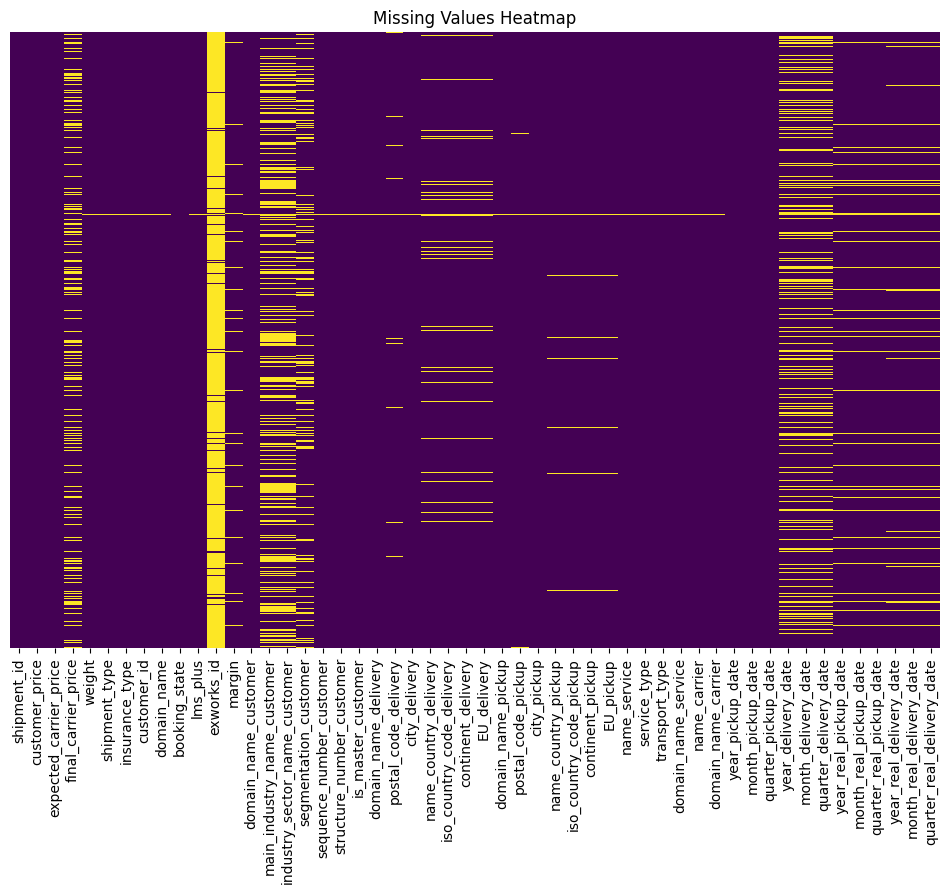

In [8]:
# Heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

## Correlation Heatmap for Numerical Features

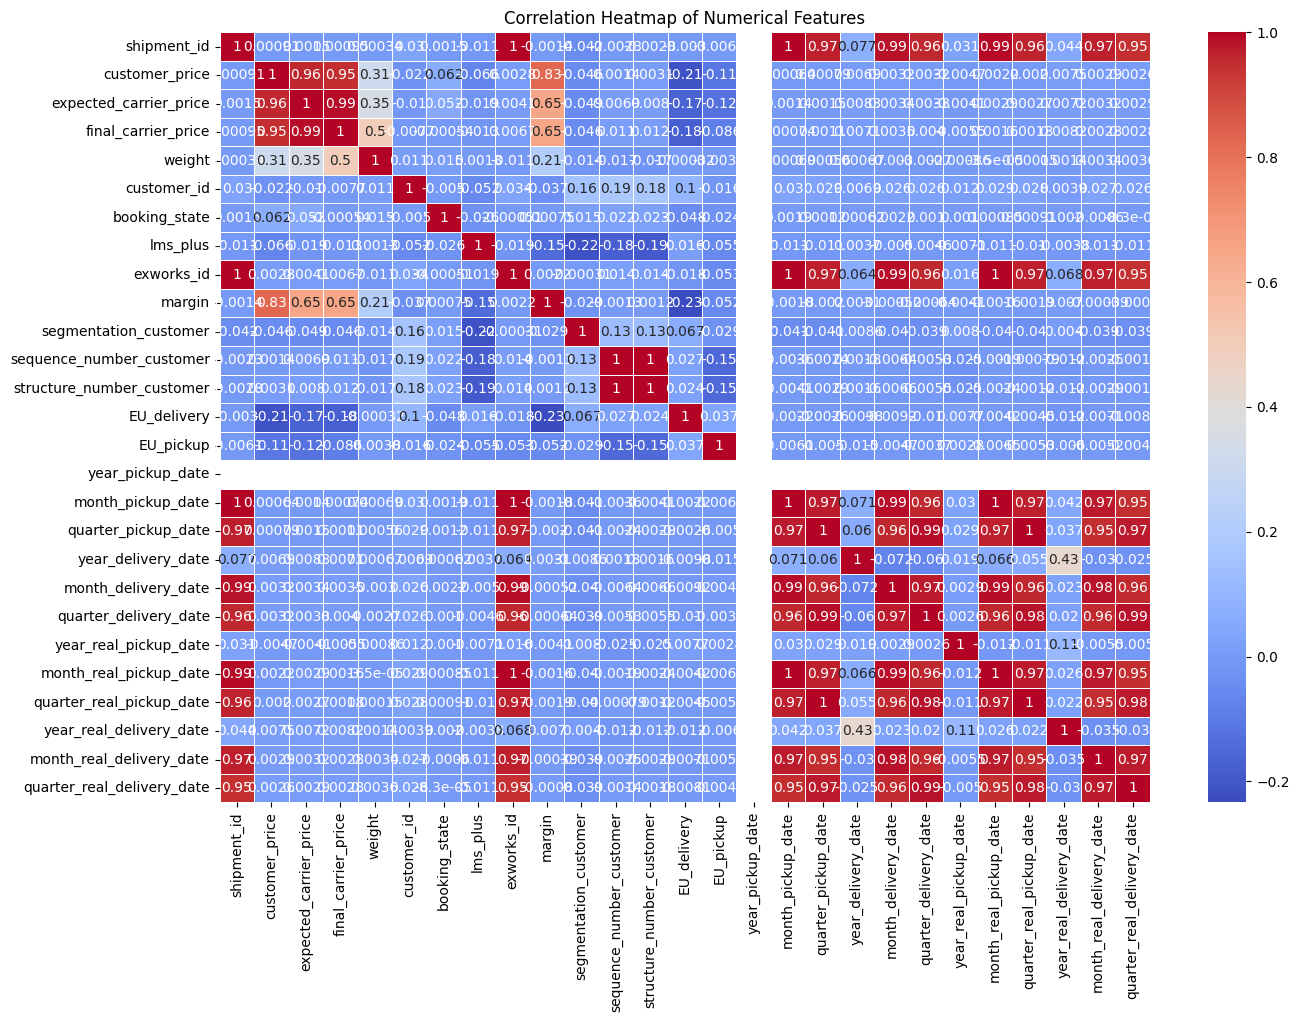

In [9]:
# Select only numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap for numerical features
plt.figure(figsize=(15, 10))
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

## Visualizing Feature Distributions

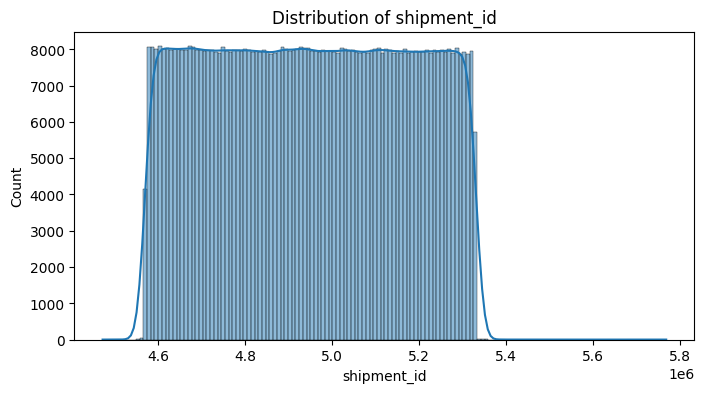

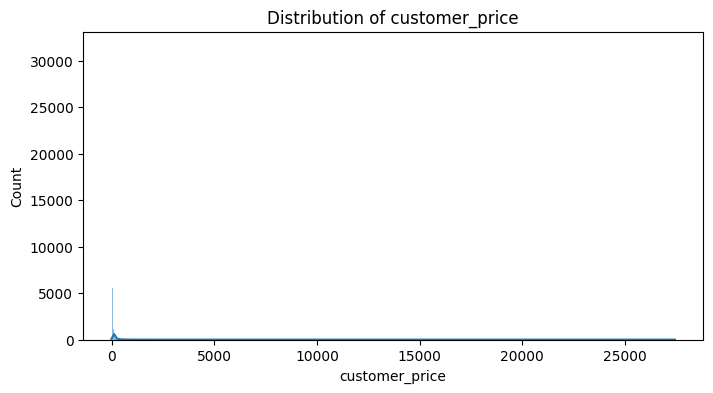

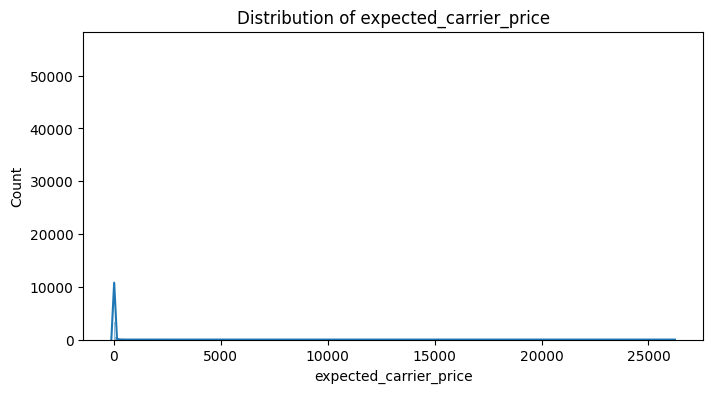

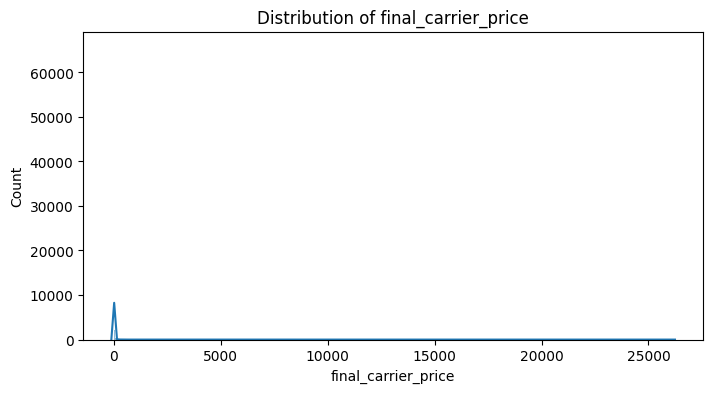

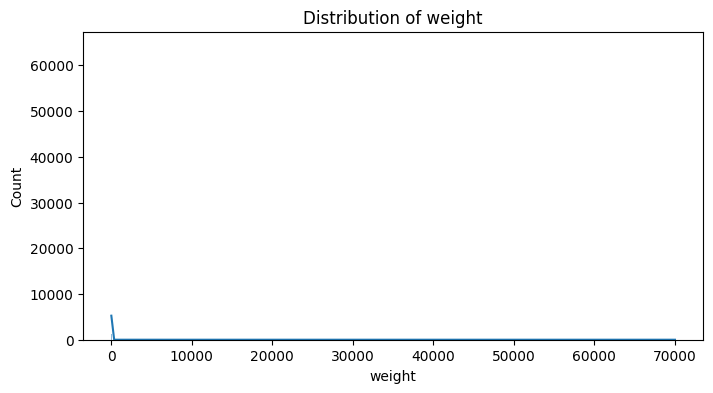

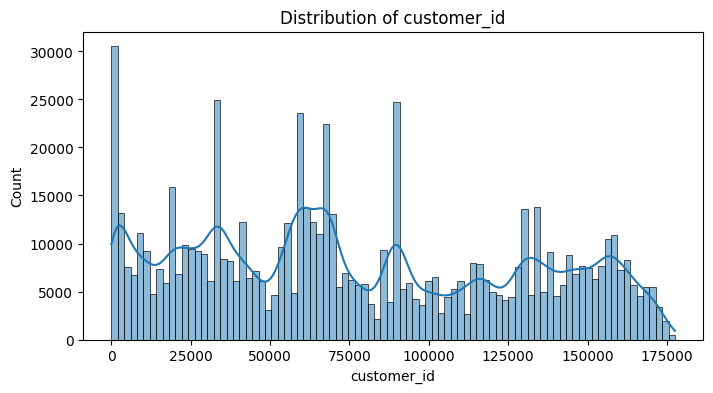

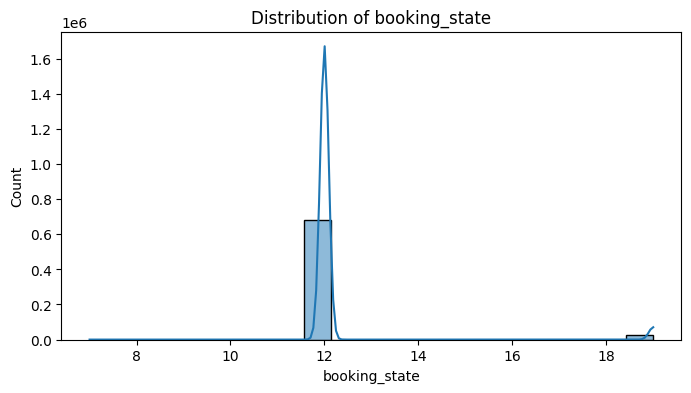

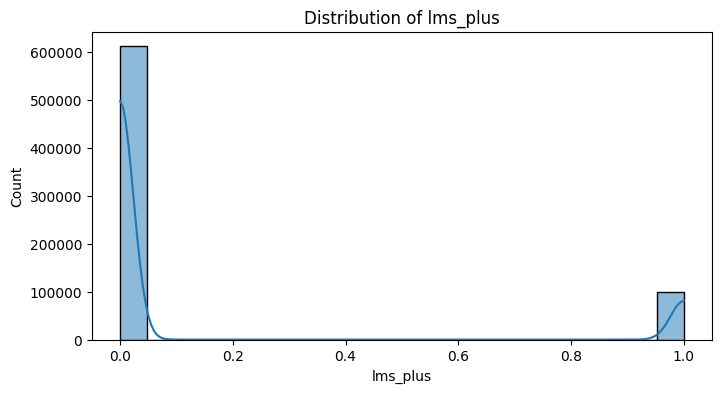

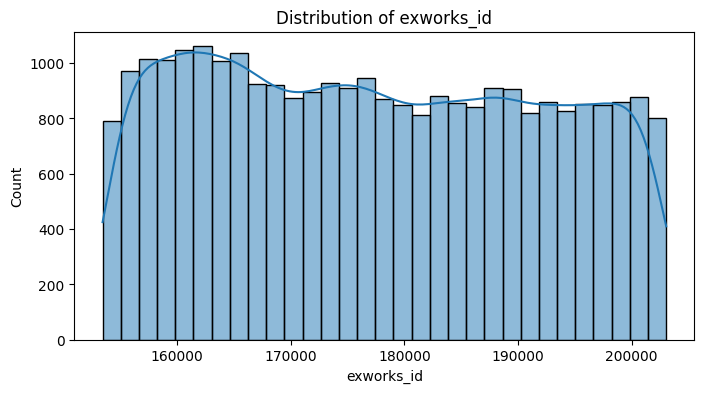

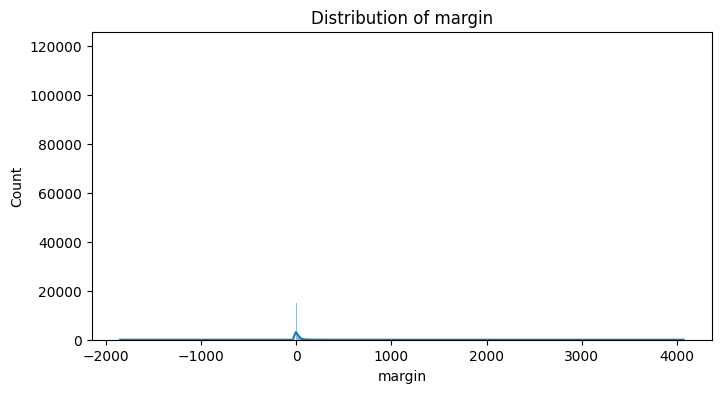

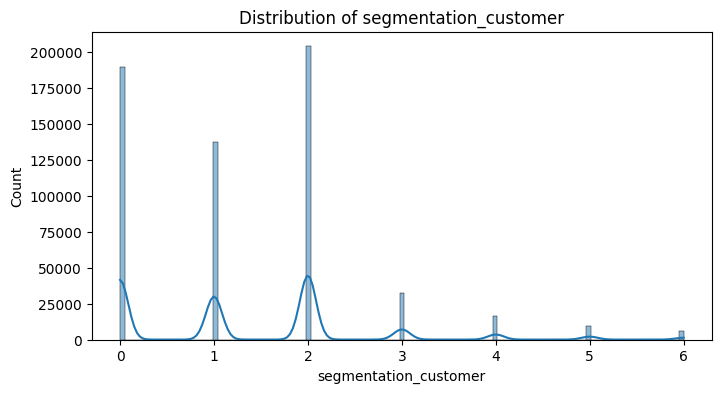

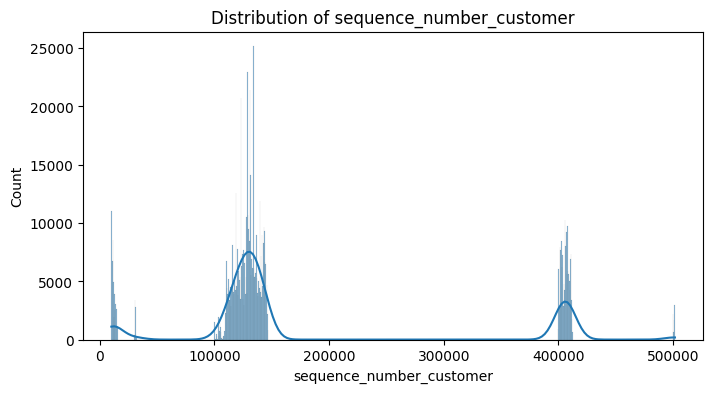

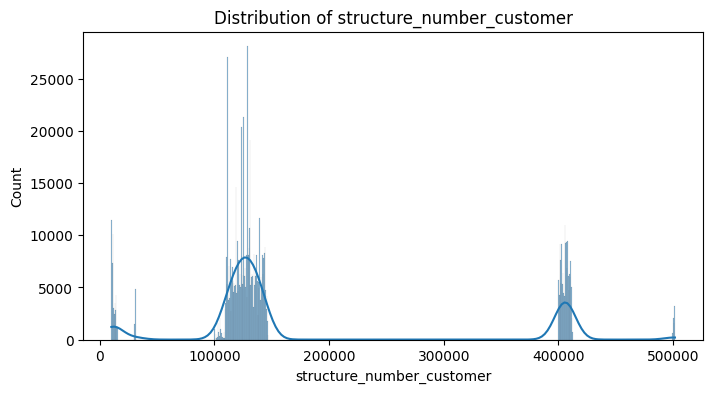

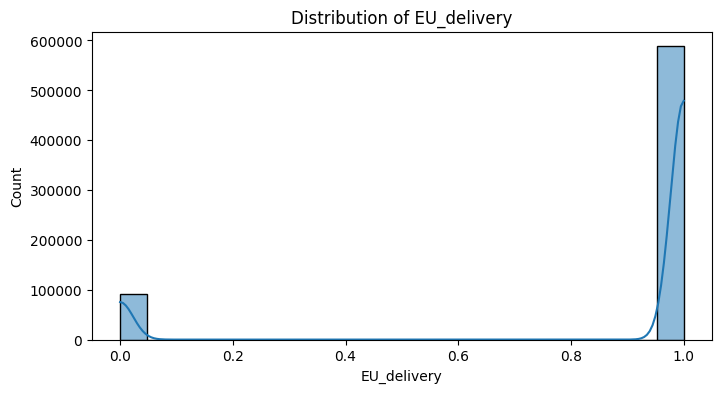

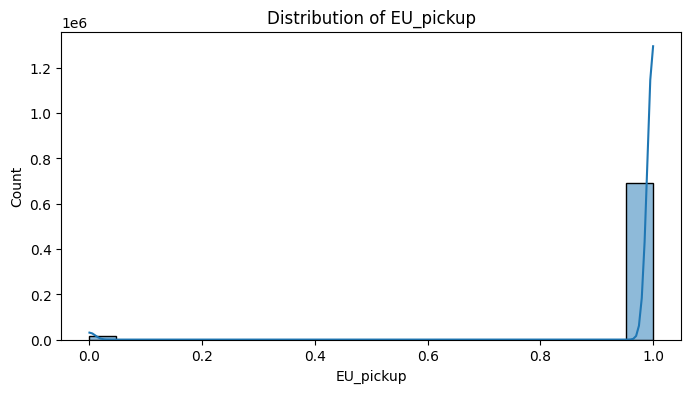

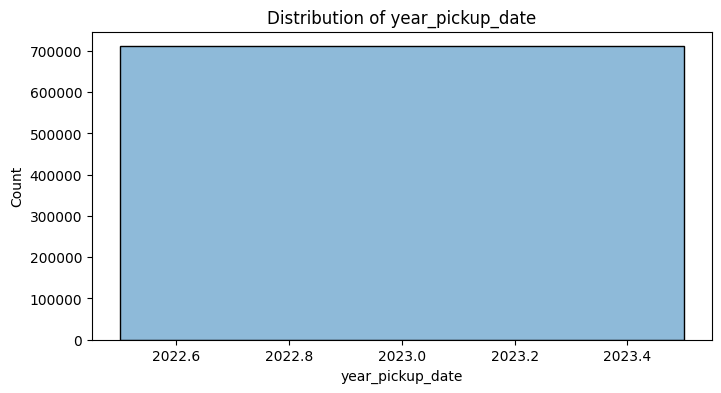

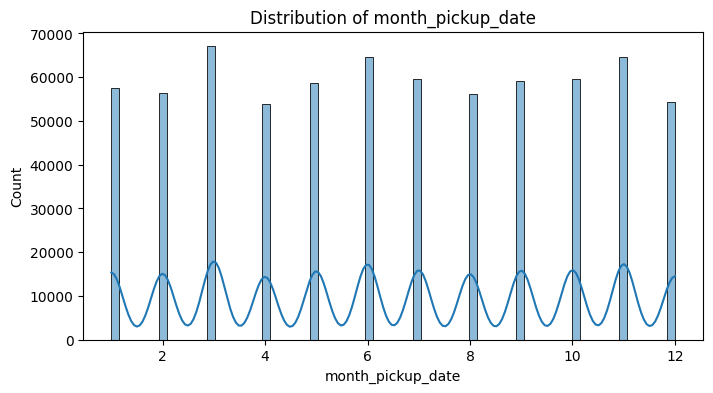

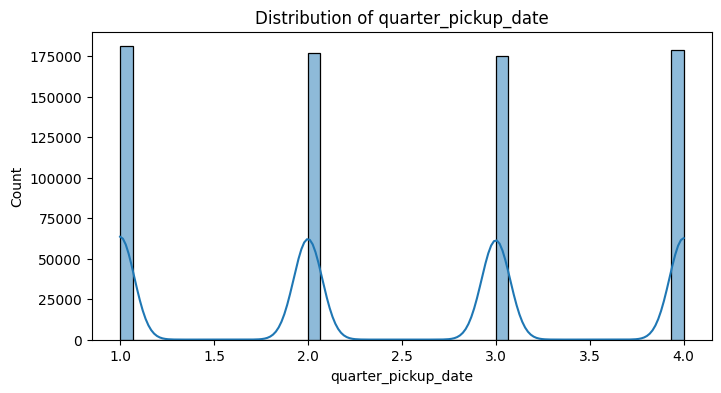

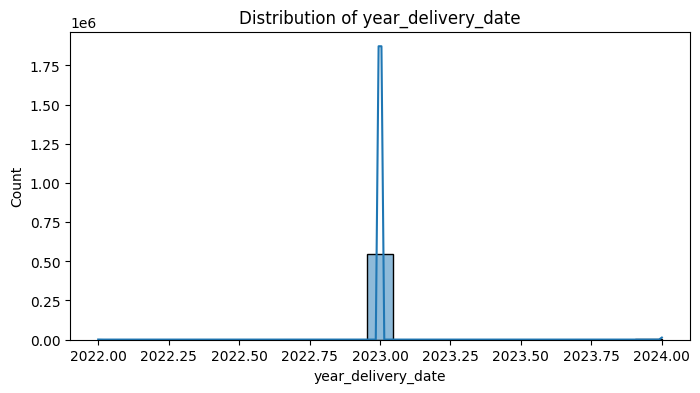

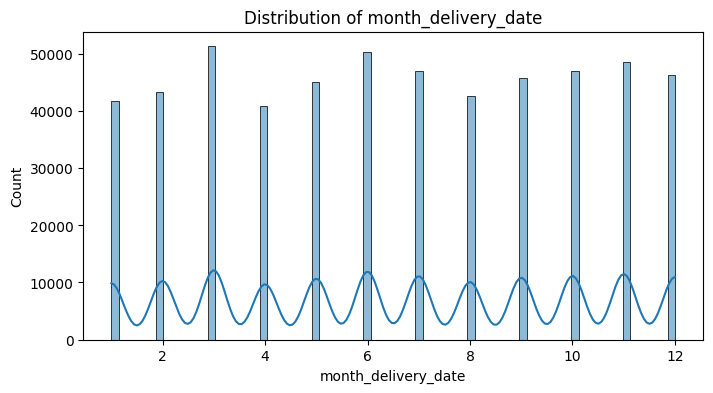

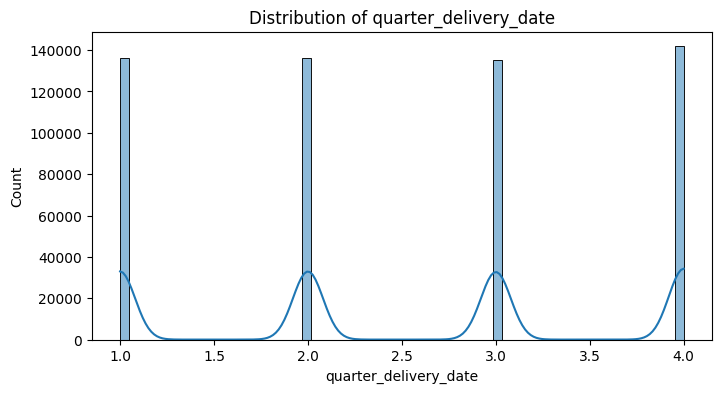

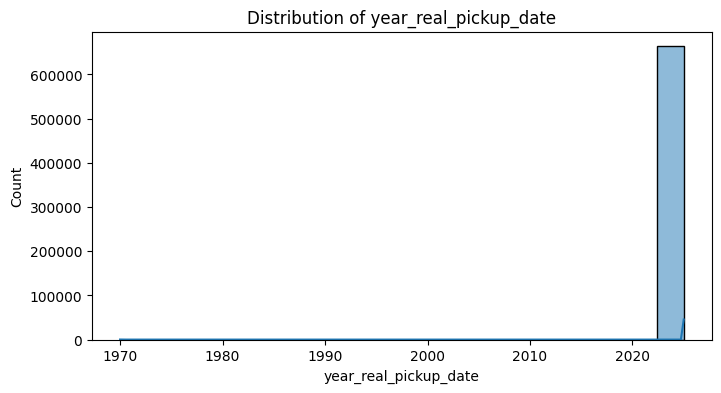

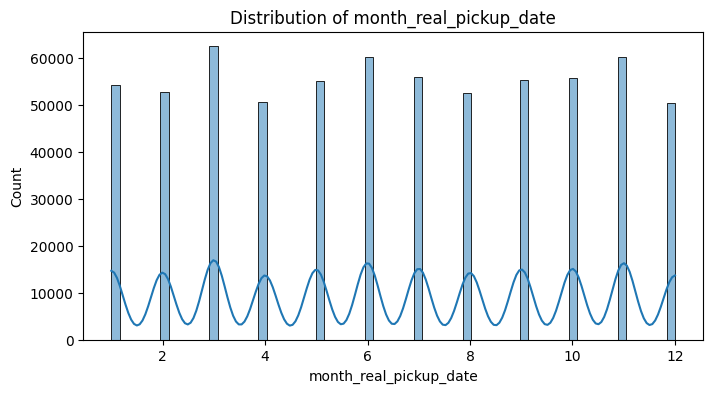

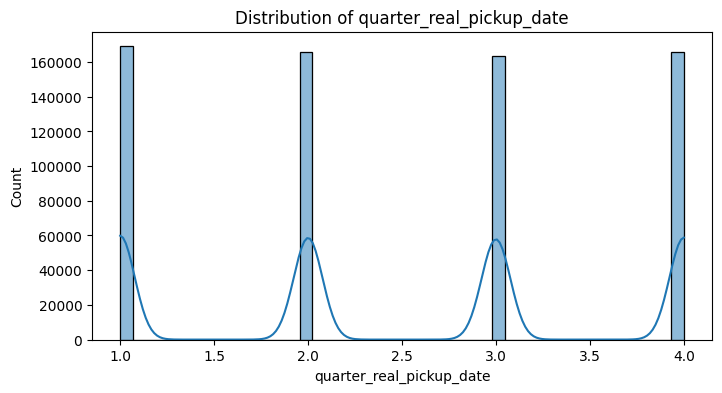

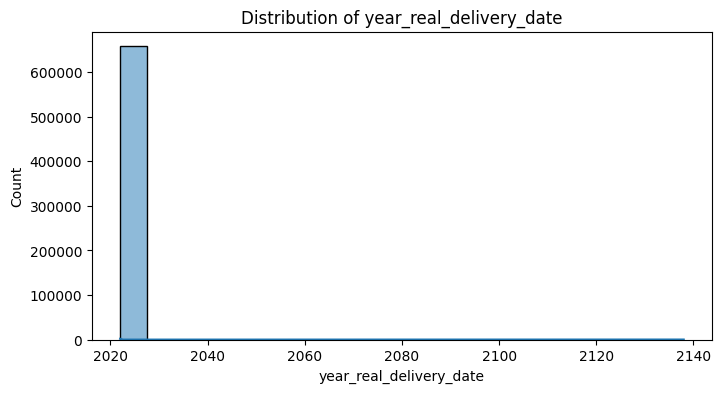

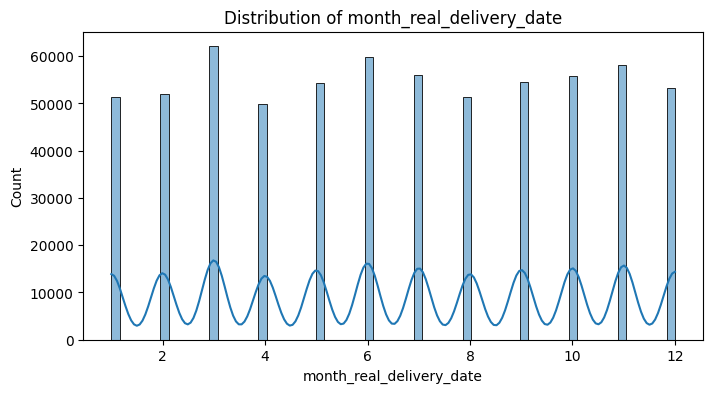

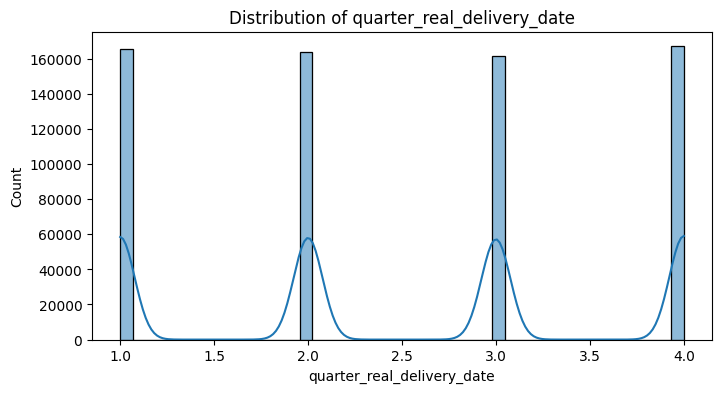

In [10]:
# Plot distribution for each numerical feature
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.show()

## Box Plots for Outlier Detection

There are some columns with many outliers.

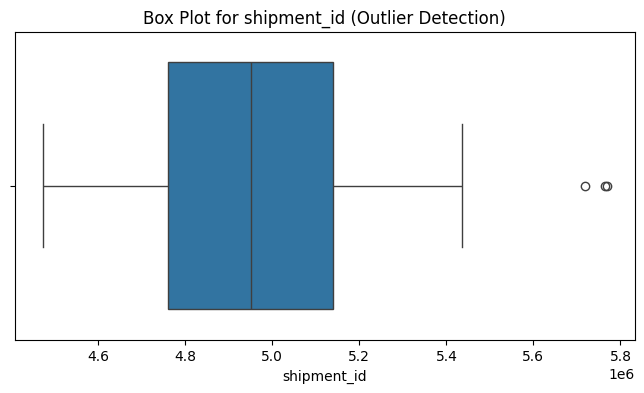

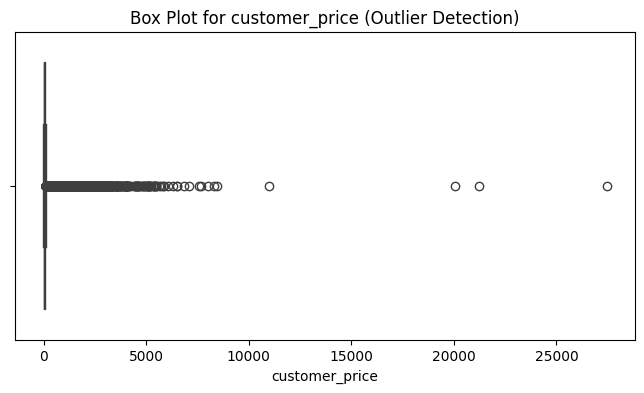

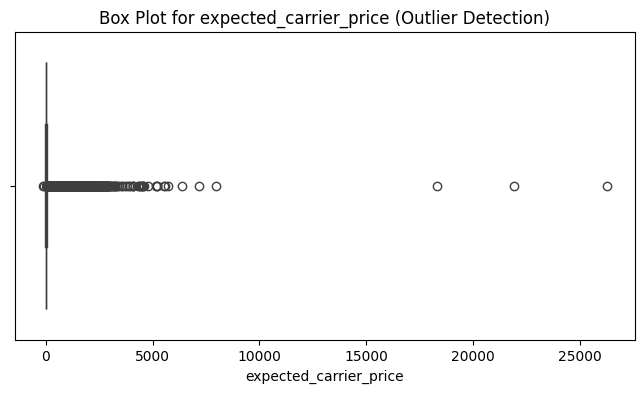

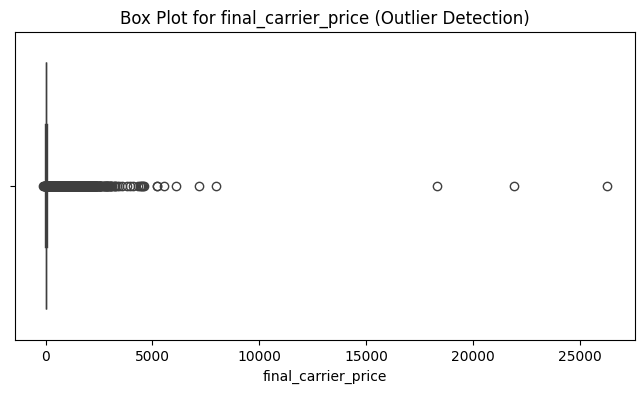

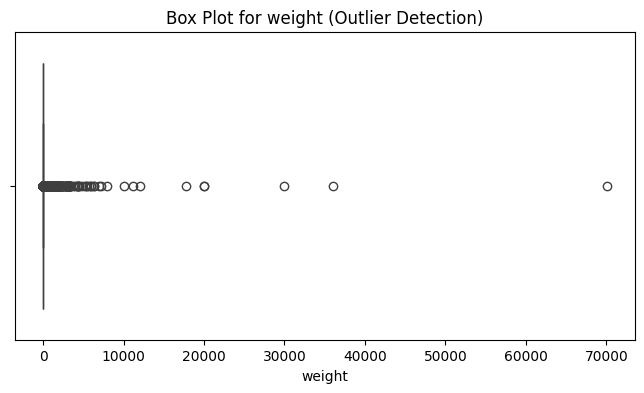

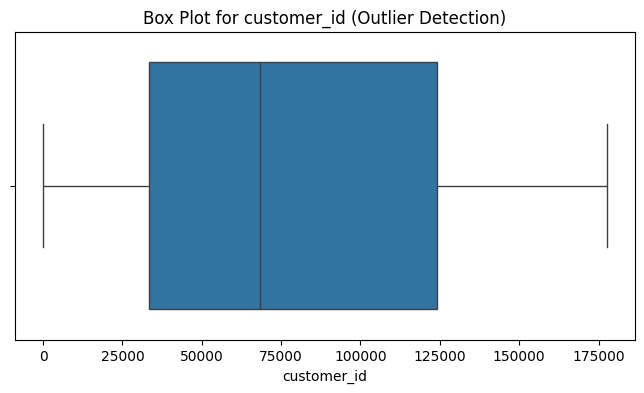

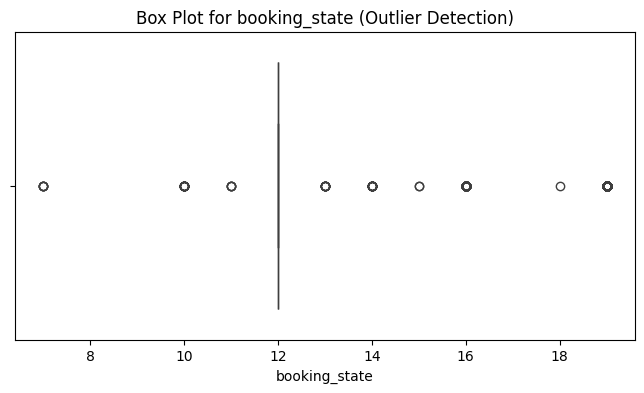

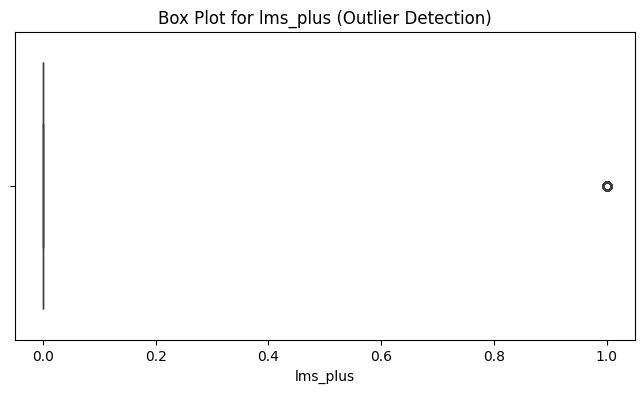

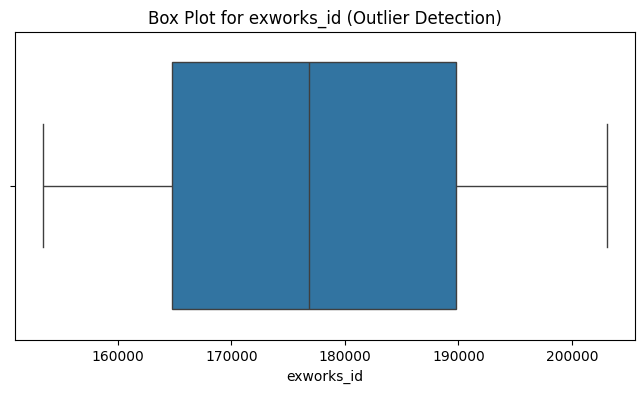

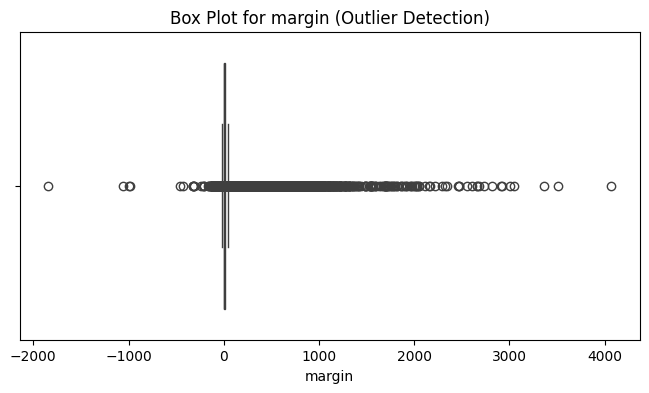

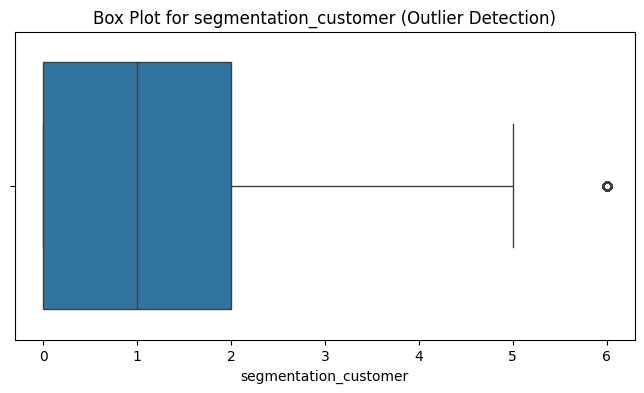

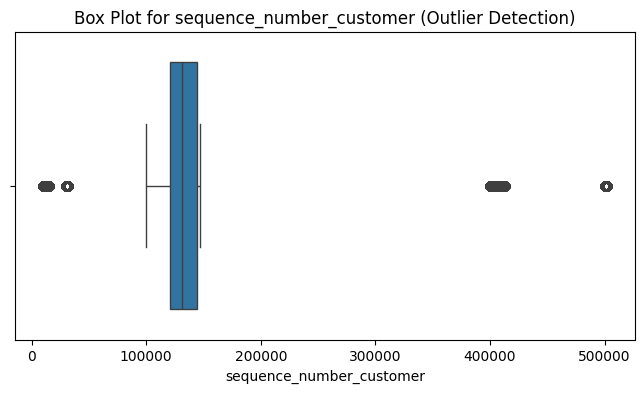

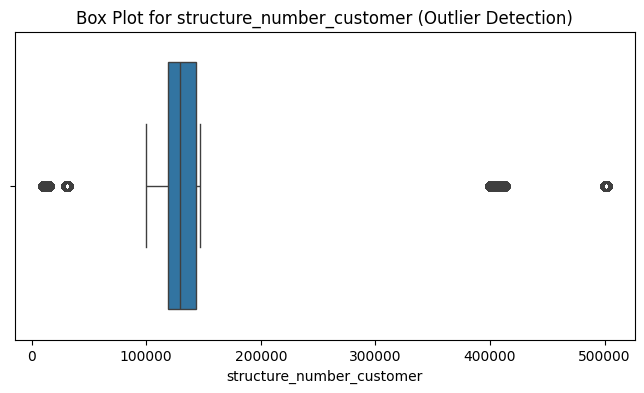

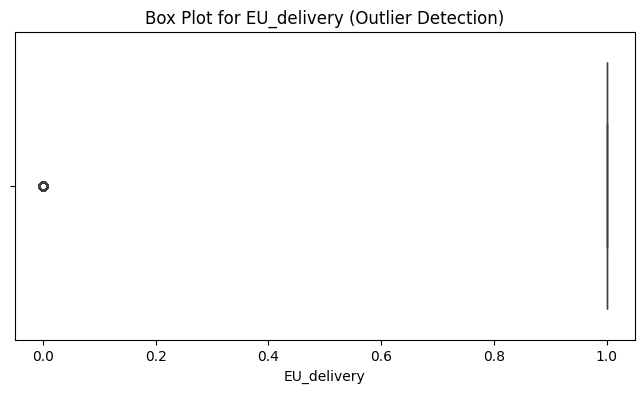

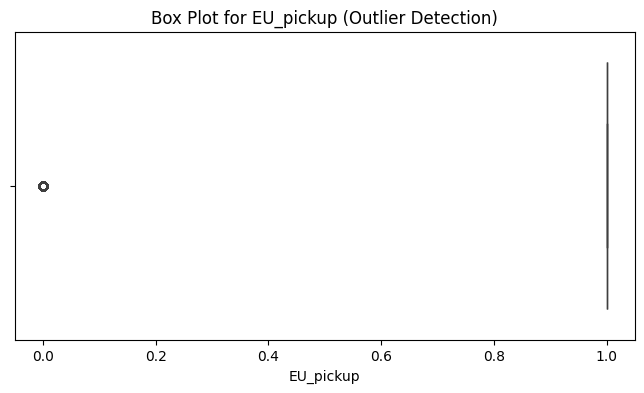

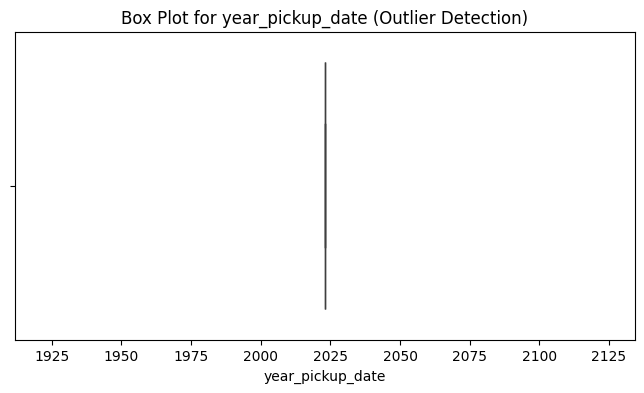

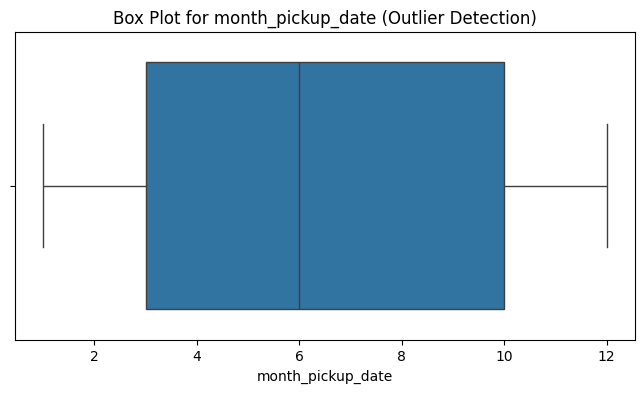

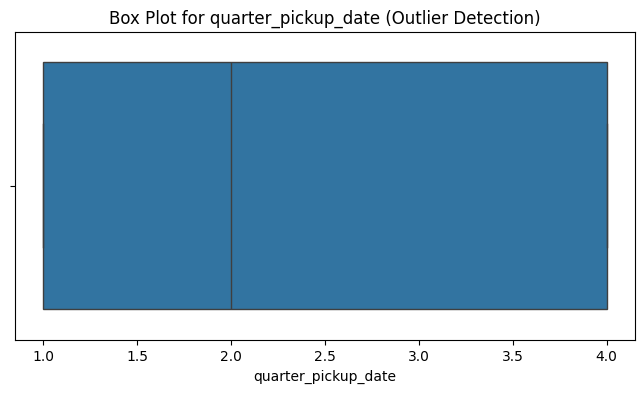

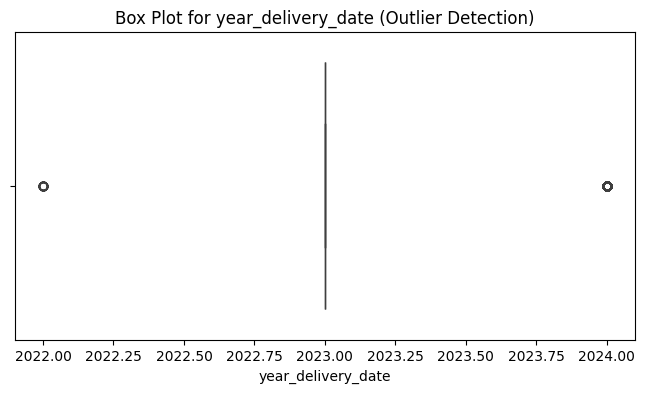

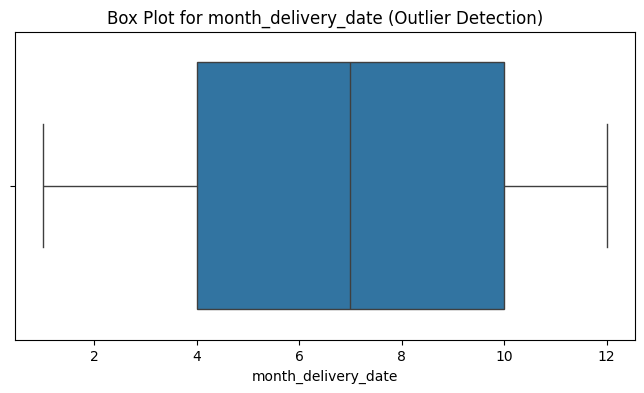

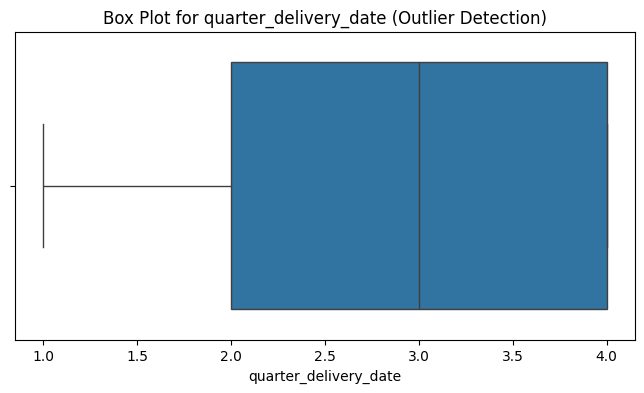

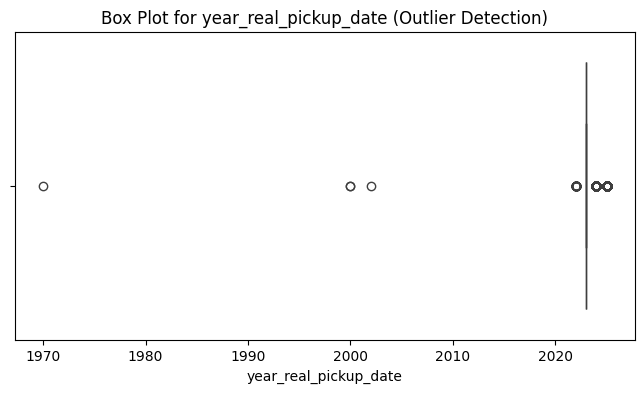

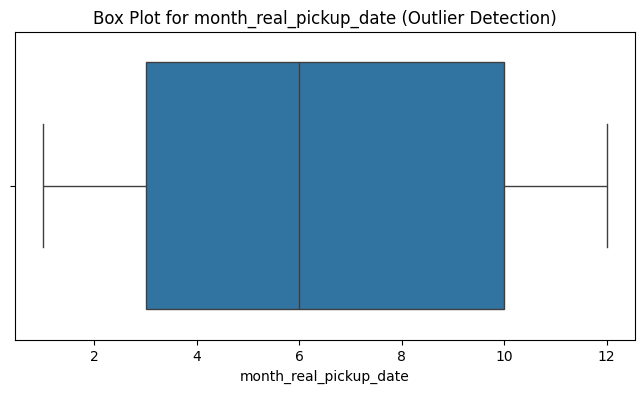

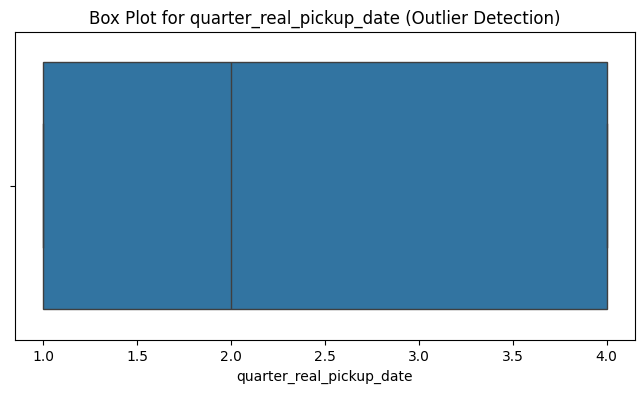

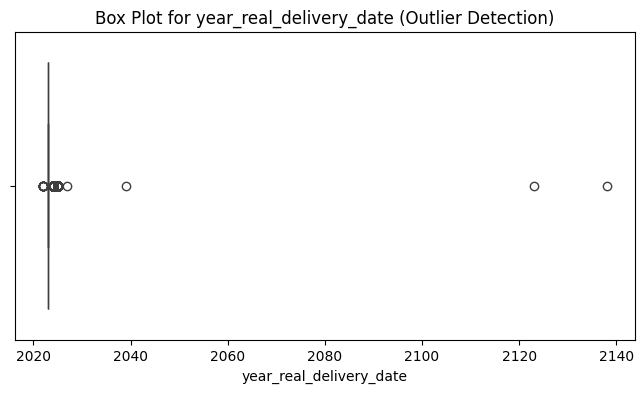

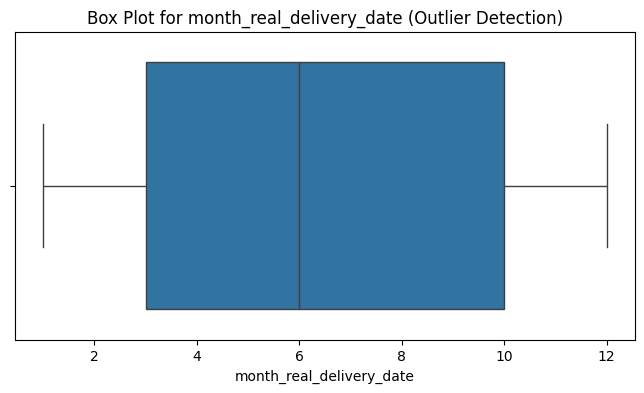

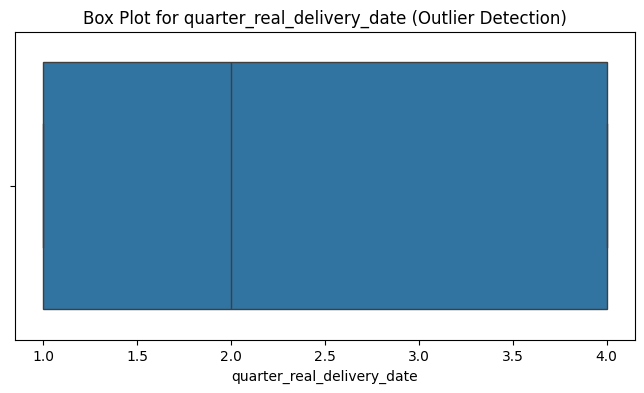

In [11]:
# Box plot for outlier detection in each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Box Plot for {feature} (Outlier Detection)")
    plt.xlabel(feature)
    plt.show()

## Feature Interaction Plots

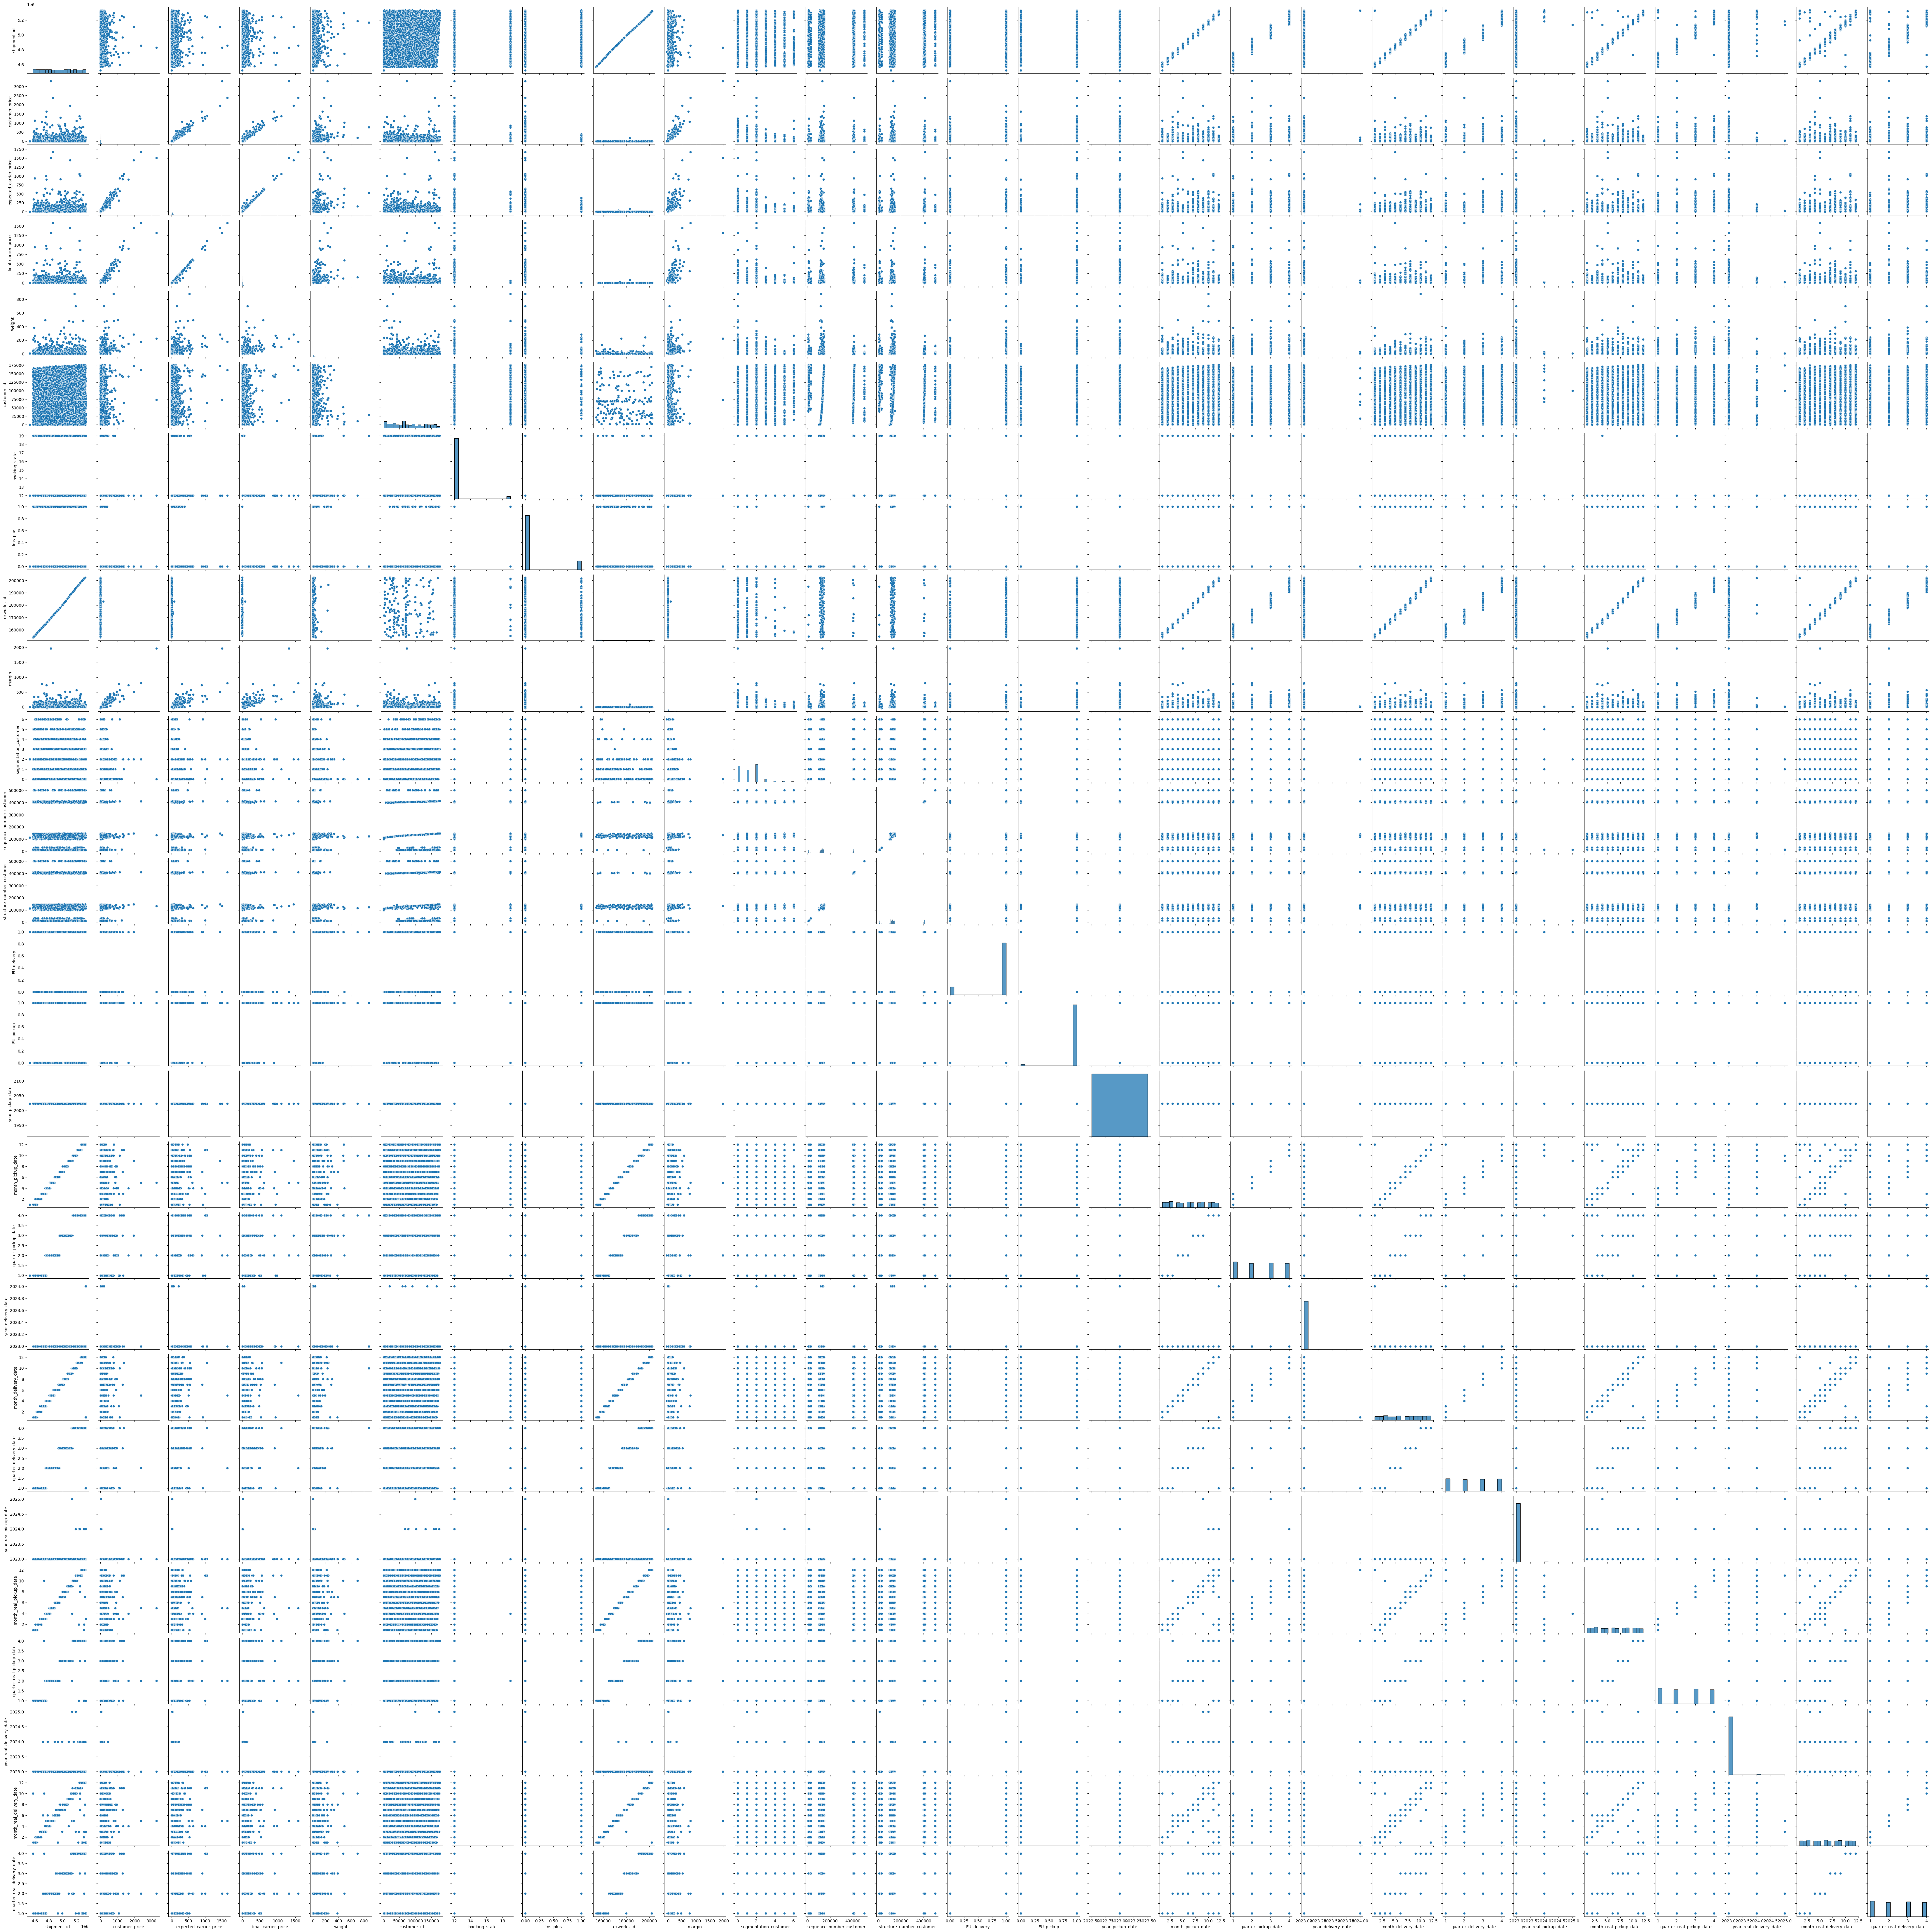

In [12]:
# Pair plot for numerical features (downsample to avoid overload if data is large)
sampled_data = df.sample(5000)  # Sample a subset to avoid overloading the plot
sns.pairplot(sampled_data[numerical_features])
plt.show()

## Target Variable Analysis

Very unbalanced for the last classes "Third_Country" and "Special".

In [13]:
df['service_type'].value_counts()

service_type
Standard         362371
Express          325761
Import            21252
Special            1298
Third_Country       334
Sameday             162
Name: count, dtype: int64

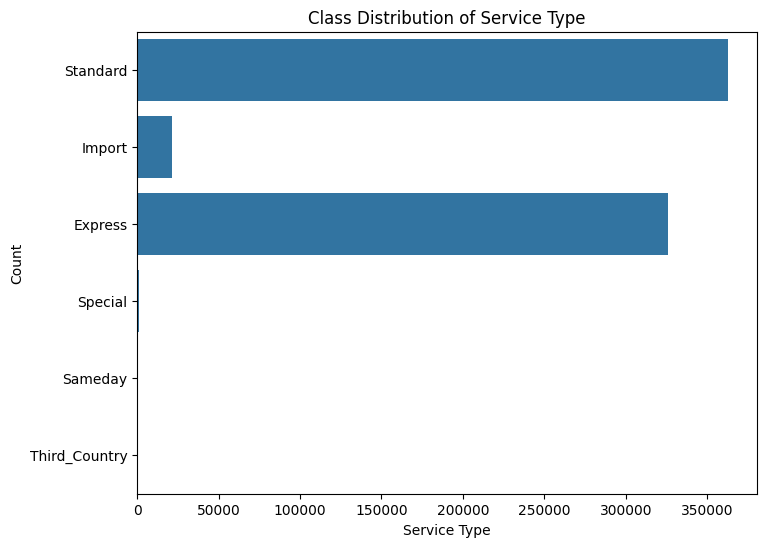

In [14]:
# Plotting the class distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(df['service_type'])
plt.title("Class Distribution of Service Type")
plt.xlabel("Service Type")
plt.ylabel("Count")
plt.show()

### Special class of the service type

We analyze in detail this class because the client told us that these cases are the ones that give the highest profit.

In [15]:
# Filter out the 'special' class cases
special_cases = df[df['service_type'] == 'Special']

In [16]:
special_cases

shipment_id  customer_price  expected_carrier_price  \
10          4557579         6850.00                 3800.00   
11776       4588795         2895.00                 1995.00   
13037       4590572          449.00                  349.00   
13247       4590976          350.00                  250.00   
15085       4593619         5650.00                 4500.00   
...             ...             ...                     ...   
708736      5328592           68.32                   52.84   
709910      5329915           68.32                   52.84   
710143      5330185         2740.00                 1890.00   
711268      5331539           77.39                   60.43   
711274      5331545           60.72                   42.66   

        final_carrier_price  weight shipment_type   insurance_type  \
10                  3800.00   807.1        Parcel  Basic_Insurance   
11776               1995.00   400.0        Parcel     No_Insurance   
13037                349.00   850.0        Parcel     No_Insurance   
13247                250.00    41.5        Parcel     No_Insurance   
15085               4500.00   920.0        Parcel     No_Insurance   
...                     ...     ...           ...              ...   
708736                50.26    56.0        Parcel     No_Insurance   
709910                50.26    52.0        Parcel     No_Insurance   
710143              1890.00  5400.0        Parcel     No_Insurance   
711268                57.88   113.0        Parcel     No_Insurance   
711274                39.77   383.0        Parcel     No_Insurance   

        customer_id domain_name  booking_state  ...  quarter_pickup_date  \
10         145995.0          DE             12  ...                  1.0   
11776       73096.0          DE             12  ...                  1.0   
13037      113273.0          DE             12  ...                  1.0   
13247       44001.0          DE             12  ...                  1.0   
15085       73096.0          DE             12  ...                  1.0   
...             ...         ...            ...  ...                  ...   
708736     160068.0          AT             12  ...                  4.0   
709910     160068.0          AT             12  ...                  4.0   
710143     142129.0          AT             12  ...                  4.0   
711268     160068.0          AT             12  ...                  4.0   
711274     160068.0          AT             12  ...                  4.0   

        year_delivery_date  month_delivery_date quarter_delivery_date  \
10                     NaN                  NaN                   NaN   
11776                  NaN                  NaN                   NaN   
13037                  NaN                  NaN                   NaN   
13247                  NaN                  NaN                   NaN   
15085                  NaN                  NaN                   NaN   
...                    ...                  ...                   ...   
708736                 NaN                  NaN                   NaN   
709910                 NaN                  NaN                   NaN   
710143                 NaN                  NaN                   NaN   
711268                 NaN                  NaN                   NaN   
711274                 NaN                  NaN                   NaN   

       year_real_pickup_date month_real_pickup_date  quarter_real_pickup_date  \
10                       NaN                    NaN                       NaN   
11776                    NaN                    NaN                       NaN   
13037                    NaN                    NaN                       NaN   
13247                    NaN                    NaN                       NaN   
15085                    NaN                    NaN                       NaN   
...                      ...                    ...                       ...   
708736                   NaN                    NaN  

Special Cases Analysis:
        shipment_id  customer_price  expected_carrier_price  \
count  1.298000e+03     1298.000000             1298.000000   
mean   5.055475e+06      336.595701              261.164599   
std    2.161241e+05     1271.832802             1175.970440   
min    4.557579e+06        0.000000                0.000000   
25%    4.866691e+06       68.610000               52.840000   
50%    5.128956e+06       89.410000               67.115000   
75%    5.246688e+06      152.557500              116.665000   
max    5.331545e+06    27450.000000            26238.000000   

       final_carrier_price        weight    customer_id  booking_state  \
count          1242.000000   1298.000000    1298.000000    1298.000000   
mean            255.189879    427.423960  146336.196456      12.214946   
std            1194.676791   1798.615644   34421.313205       1.210666   
min               0.000000      0.000000    1023.000000      11.000000   
25%              50.260000     71.0000

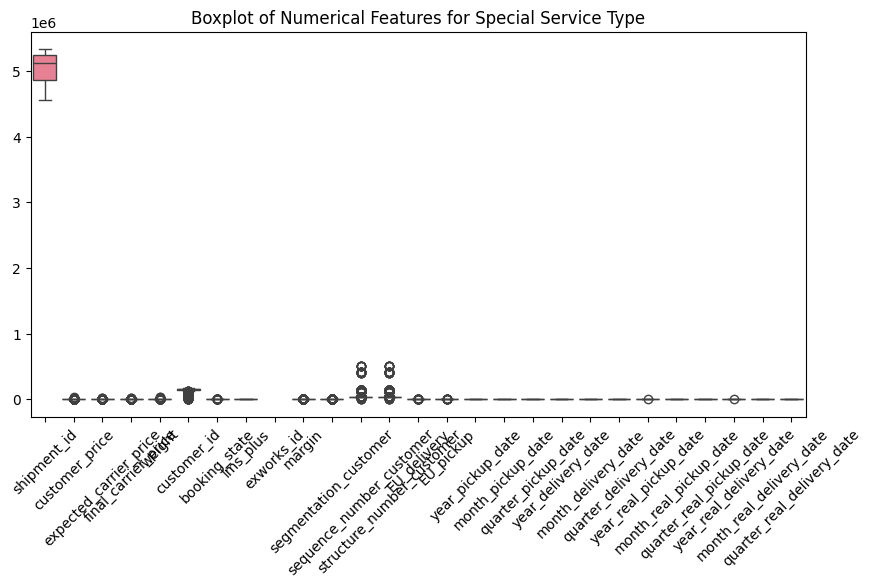

In [17]:
# Plot distribution for each numerical feature
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Display the special cases
print("Special Cases Analysis:")
print(special_cases.describe())  # General statistics for numerical features
print(special_cases.head())  # View the first few rows of the special cases

# Plot some of the key features for visual analysis
plt.figure(figsize=(10, 5))
sns.boxplot(data=special_cases[numerical_features])
plt.title('Boxplot of Numerical Features for Special Service Type')
plt.xticks(rotation=45)
plt.show()

### Margin comparison

As we can see, the margin for the "Special" class of the target variable isn't higher as we expected, but we will still consider it to be more valuable.

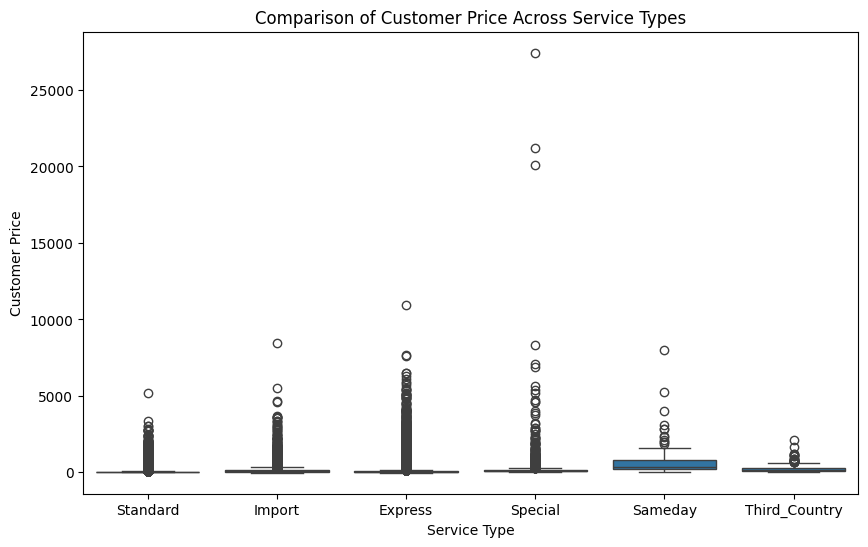

In [18]:
# Compare the customer price of 'special' cases with all other classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='service_type', y='customer_price', data=df)
plt.title('Comparison of Customer Price Across Service Types')
plt.xlabel('Service Type')
plt.ylabel('Customer Price')
plt.show()

In [19]:
# Create a new dataframe with derived margin
df_margin_analysis = df[['service_type', 'customer_price', 'final_carrier_price', 'expected_carrier_price']]

# Derive margin estimate as customer_price - final_carrier_price or expected_carrier_price if final_carrier_price is not available
df_margin_analysis['derived_margin'] = df_margin_analysis['customer_price'] - df_margin_analysis['final_carrier_price'].fillna(df_margin_analysis['expected_carrier_price'])

<ipython-input-19-427fc438419c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_margin_analysis['derived_margin'] = df_margin_analysis['customer_price'] - df_margin_analysis['final_carrier_price'].fillna(df_margin_analysis['expected_carrier_price'])


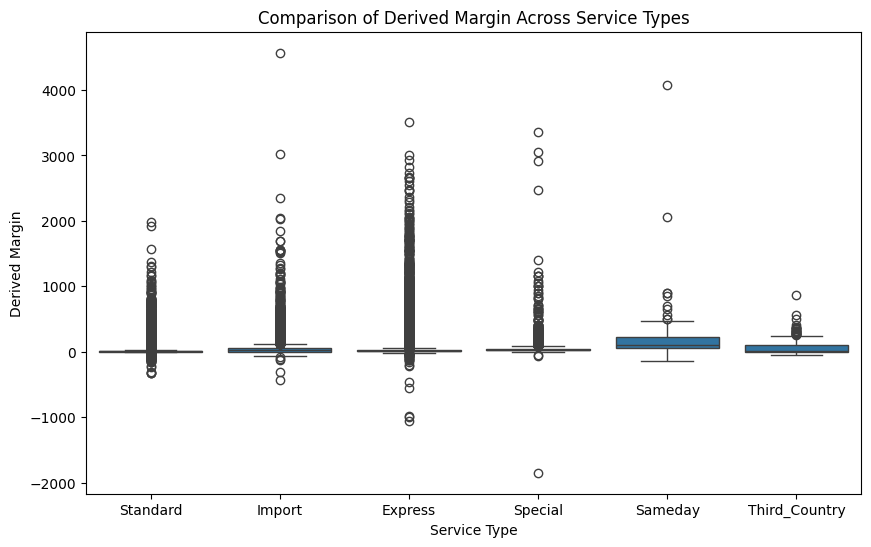

In [20]:
# Compare the derived margin of 'special' cases with all other classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='service_type', y='derived_margin', data=df_margin_analysis)
plt.title('Comparison of Derived Margin Across Service Types')
plt.xlabel('Service Type')
plt.ylabel('Derived Margin')
plt.show()

## Feature Importance Analysis (initial)

Analyze the feature importance before the preprocessing.

It uses a smaller sample to speed up the analysis in this phase.

The feature importance will also be used later to have a better view after the preprocessing.

*Note*: For the categorical variables, we apply the One-Hot Encoding for the columns with less than 10 classes, while we apply "Label Encoding" for the ones with a higher count.

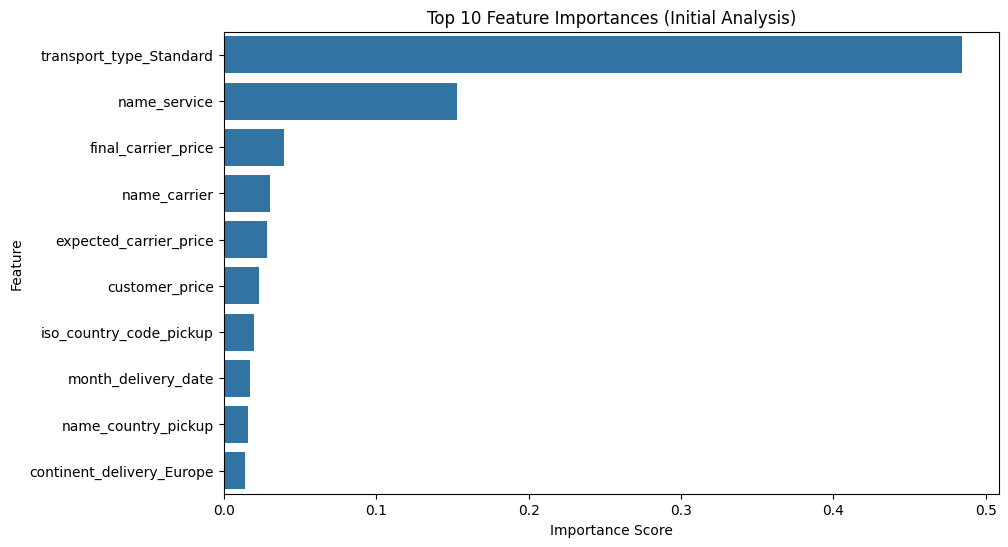

In [24]:
# Downsample the data to avoid memory overload
df_sampled = df.sample(frac=0.1, random_state=42)  # Use only 10% of the data

# Separate the target column before any transformations
target_column = 'service_type'
y = df_sampled[target_column]

# Drop the target column from the feature set
X = df_sampled.drop(columns=[target_column])

# Split numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Handle categorical columns
for col in categorical_cols:
    if X[col].nunique() > 10:  # High cardinality threshold (e.g., > 10 unique values)
        # Apply Label Encoding for high-cardinality features
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    else:
        # Apply One-Hot Encoding for low-cardinality features
        X = pd.get_dummies(X, columns=[col], drop_first=True)

# Encode categorical target column if not already encoded
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)

# Train a RandomForestClassifier for feature importance analysis
rf = RandomForestClassifier(n_estimators=20, random_state=42)  # Reduced number of estimators to limit memory usage
rf.fit(X, y)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=importances.index)
plt.title("Top 10 Feature Importances (Initial Analysis)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## Correlation with Target Variable

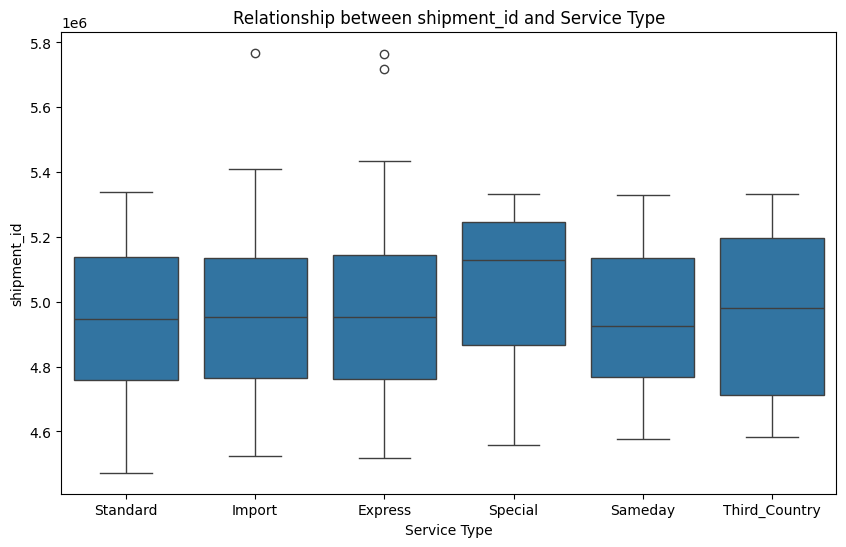

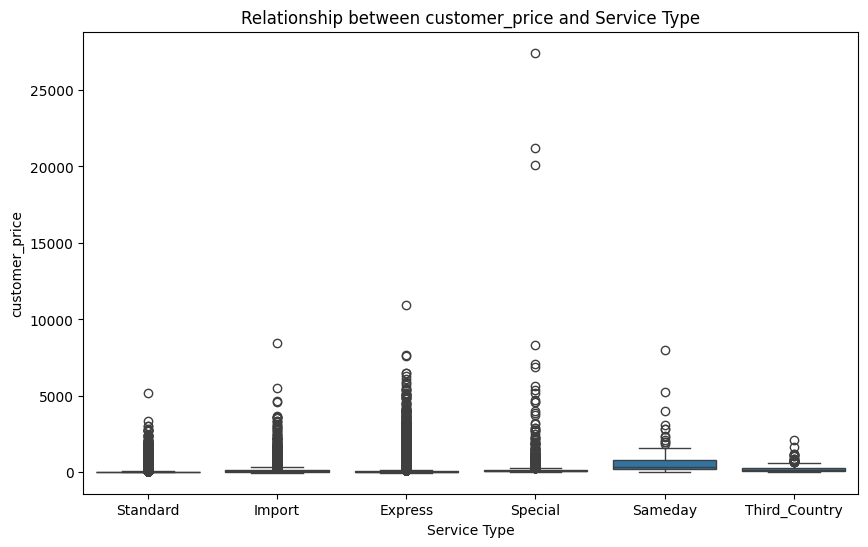

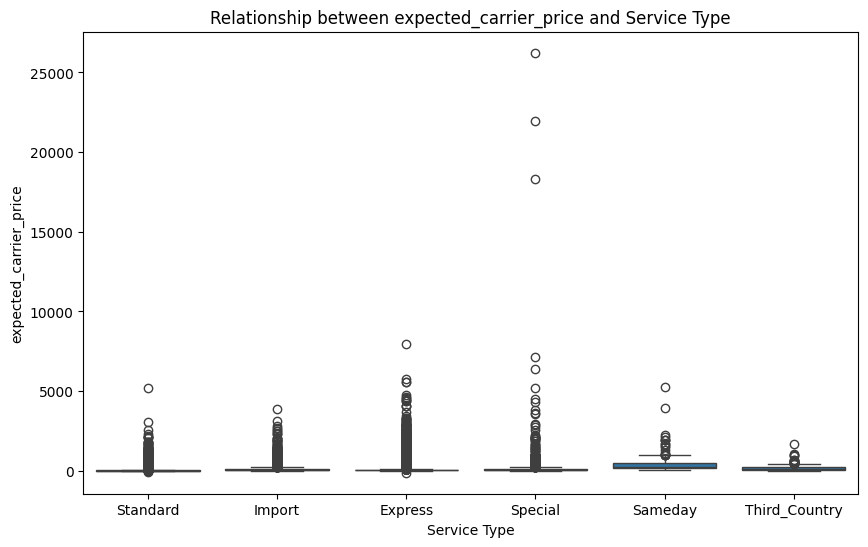

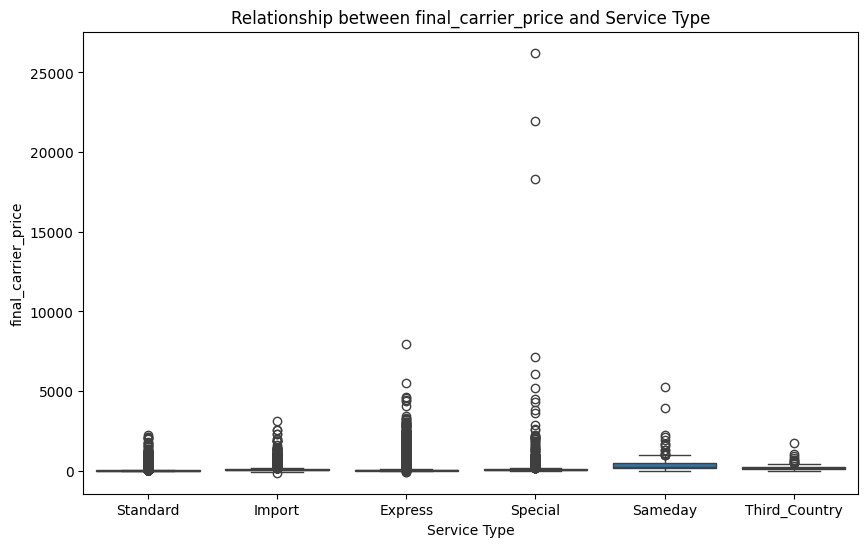

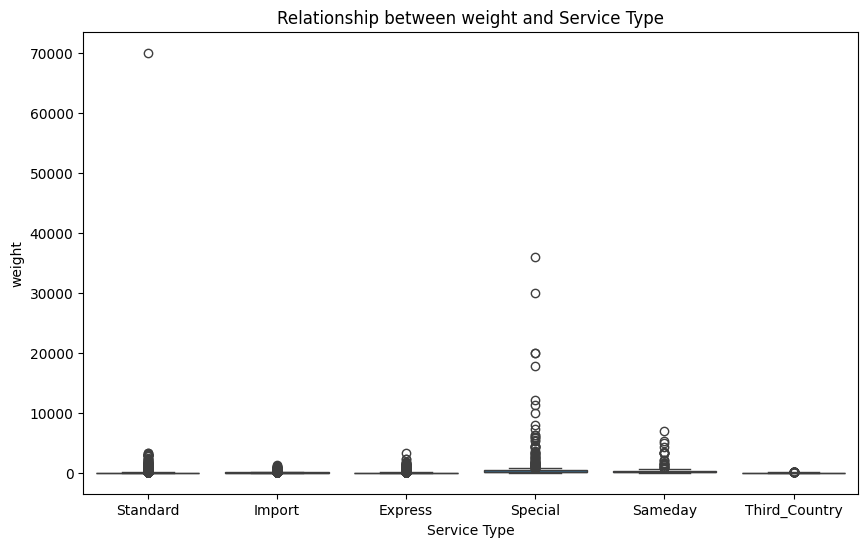

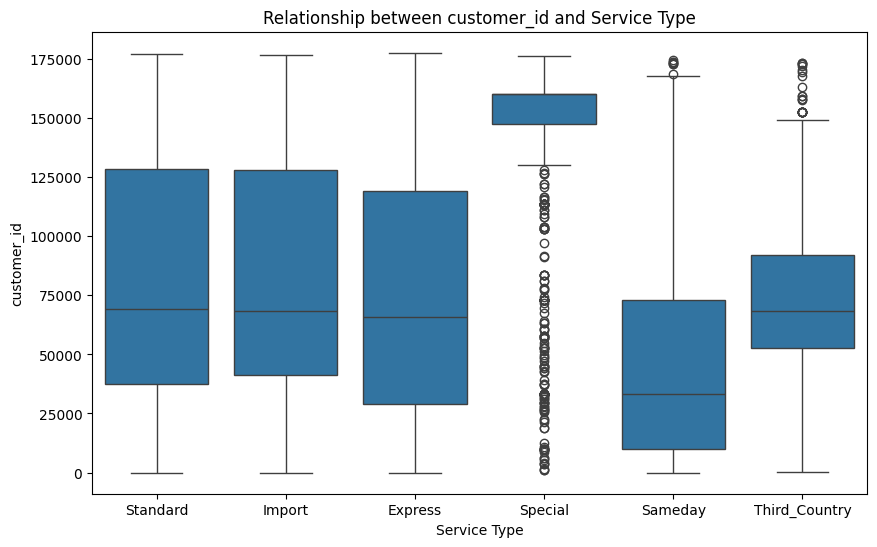

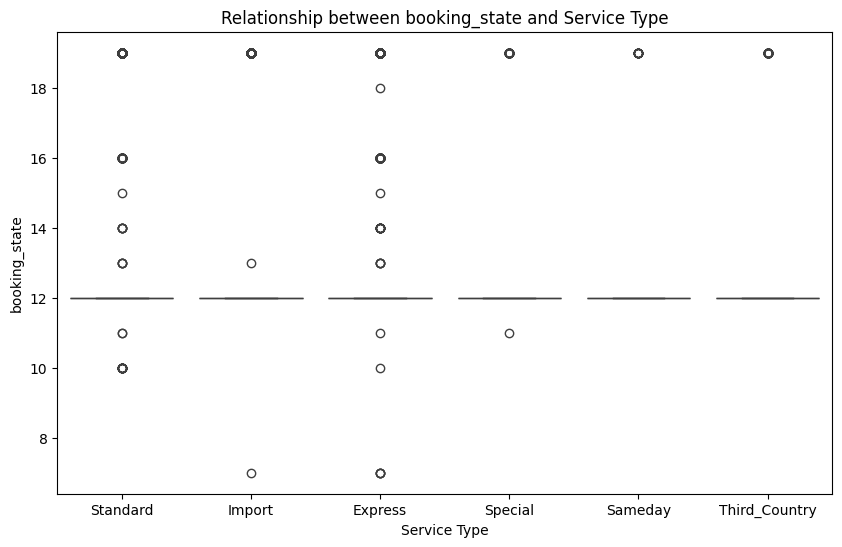

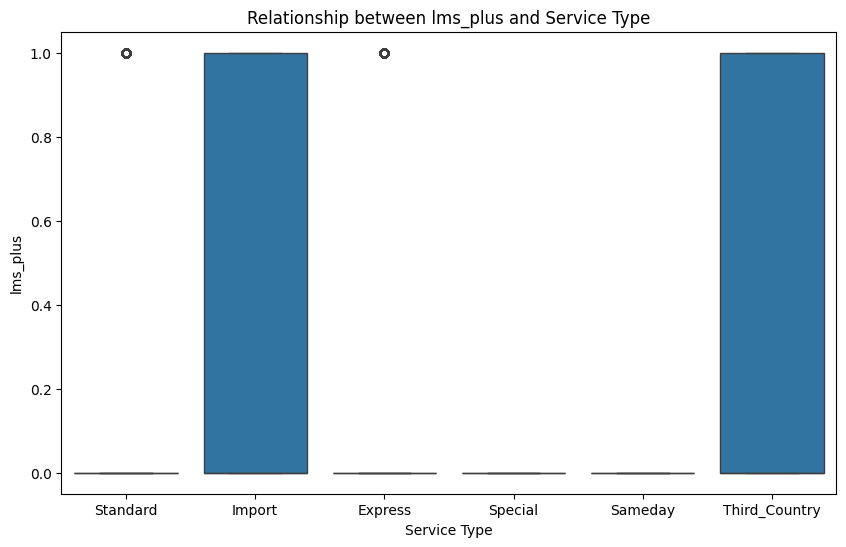

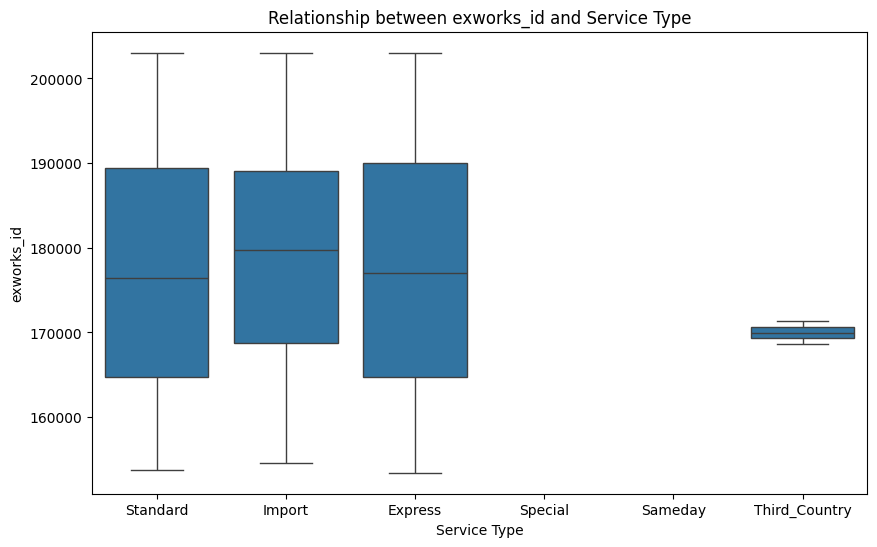

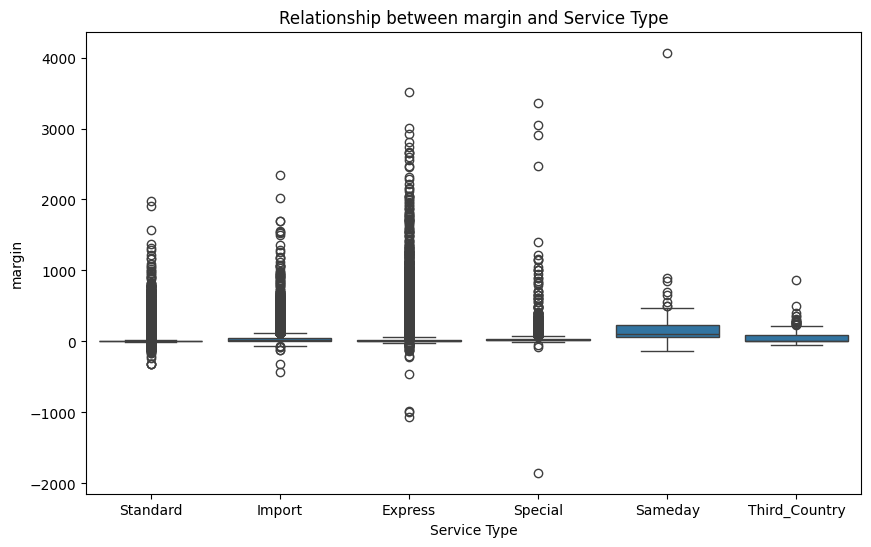

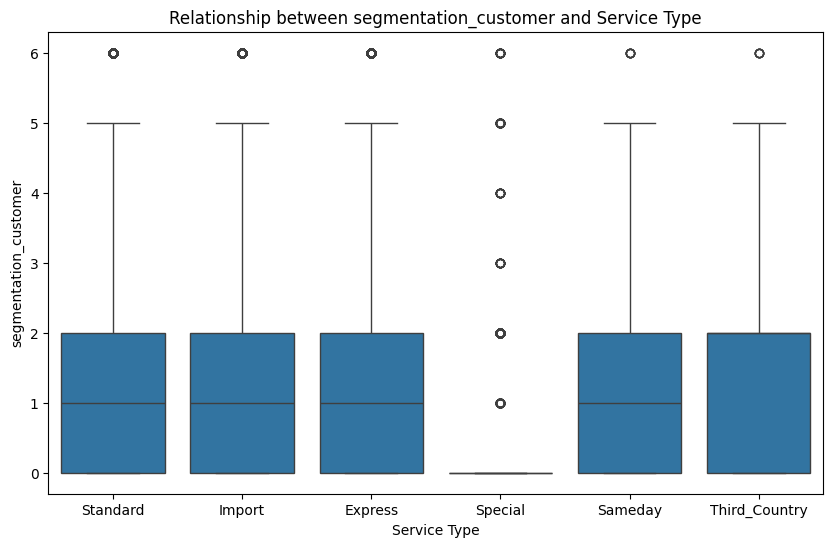

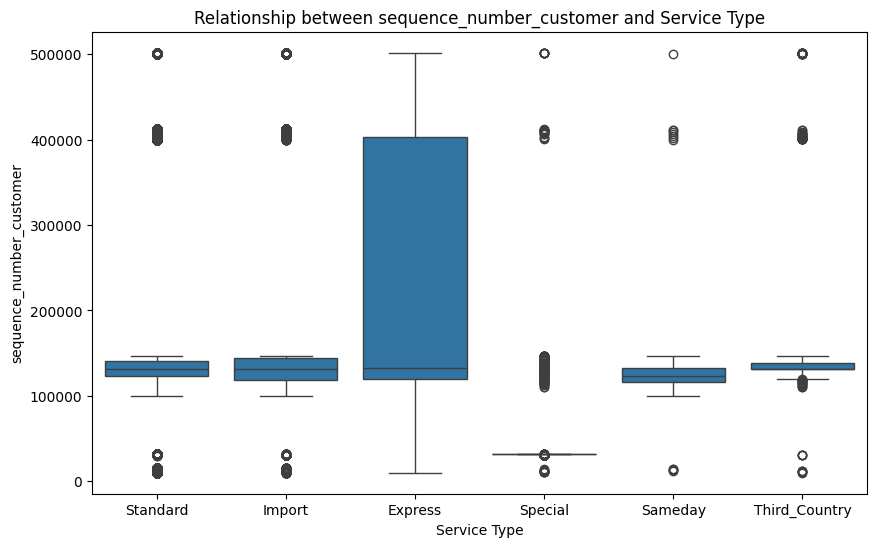

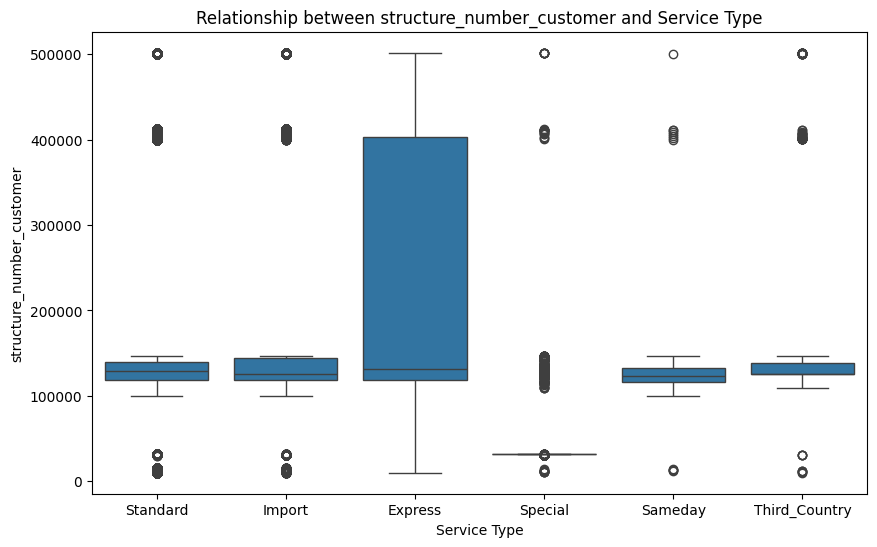

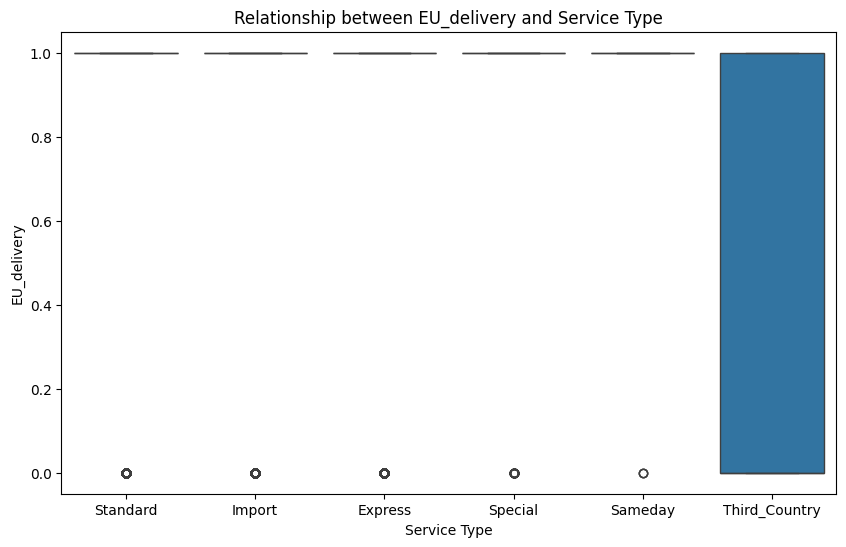

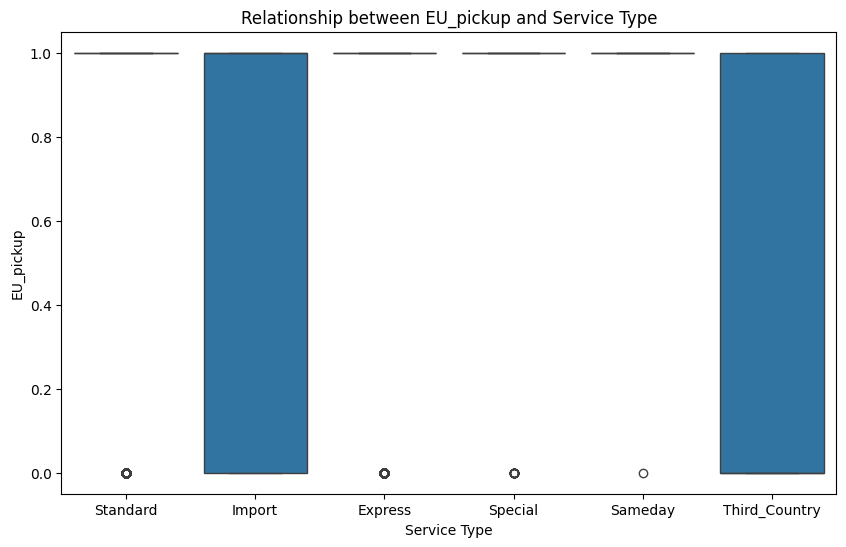

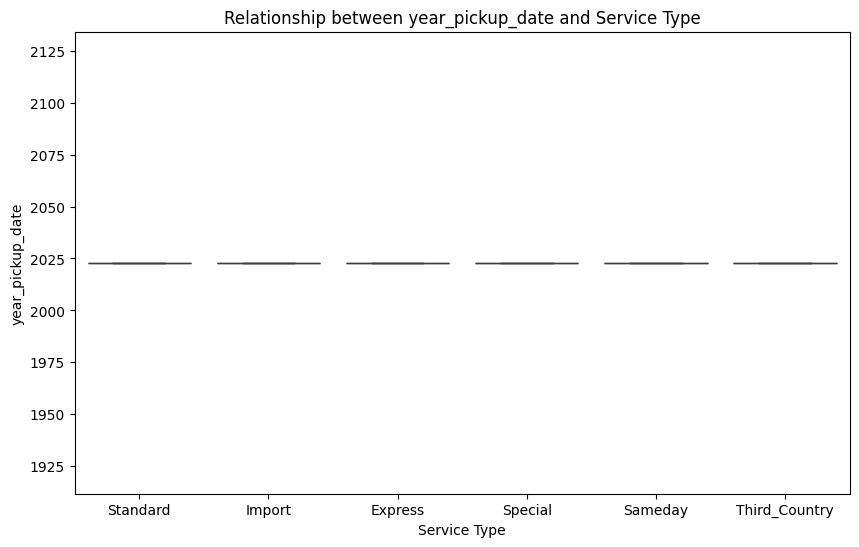

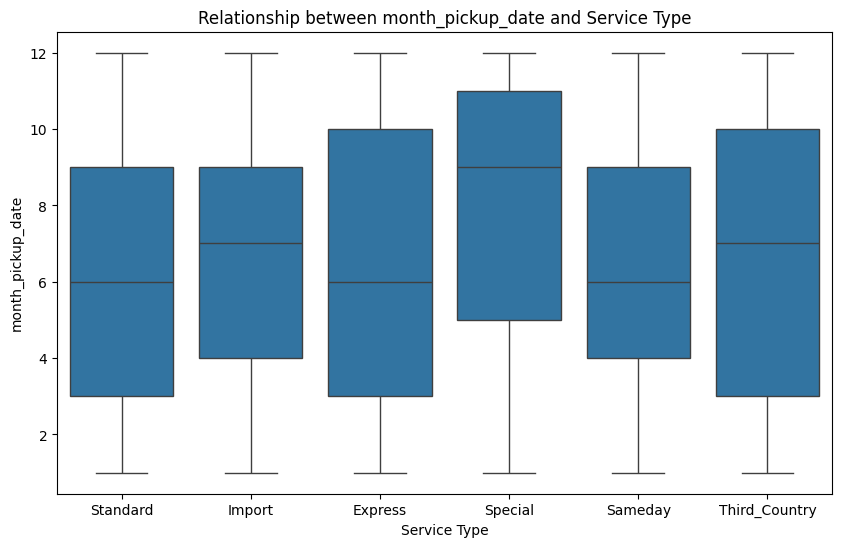

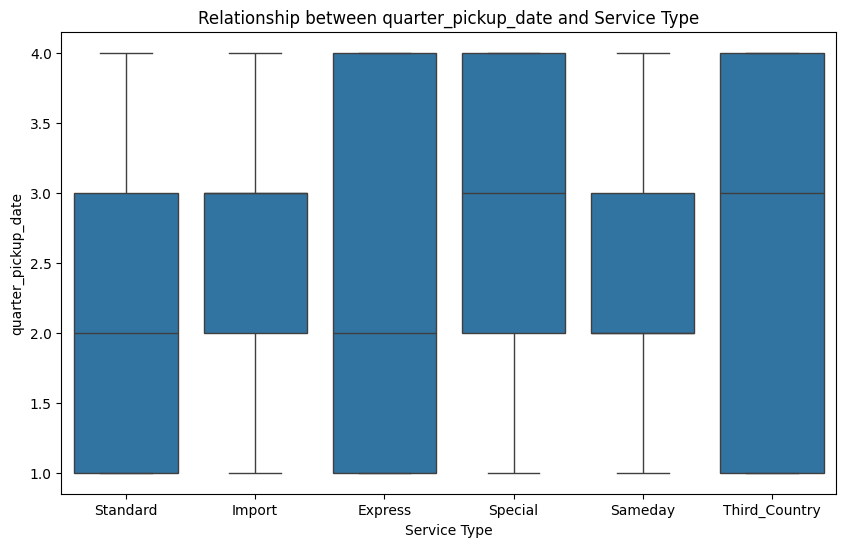

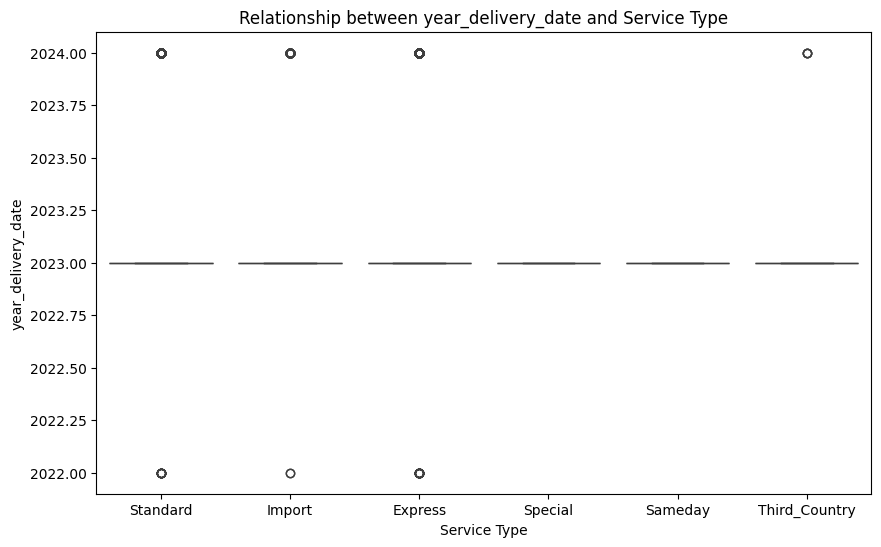

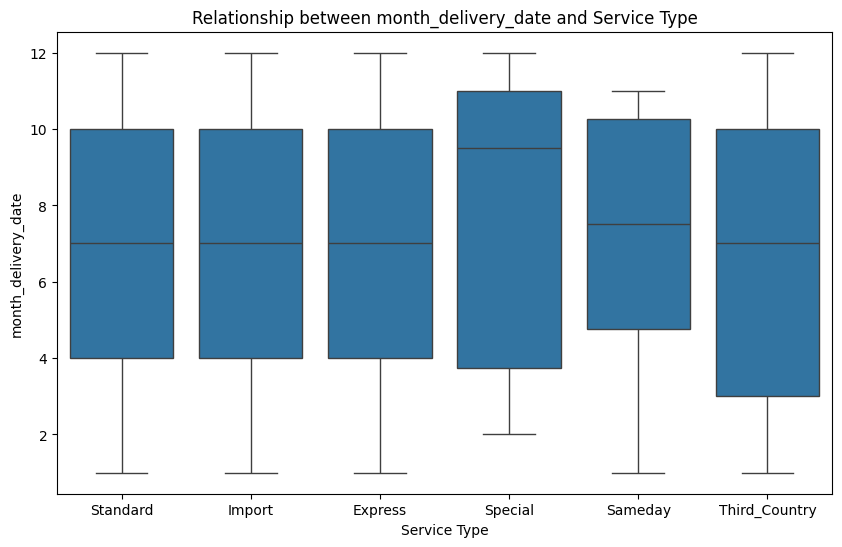

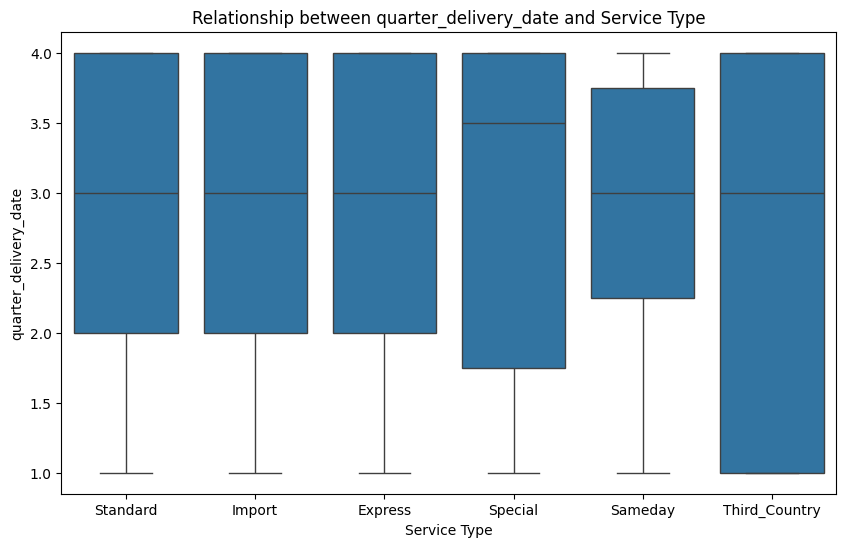

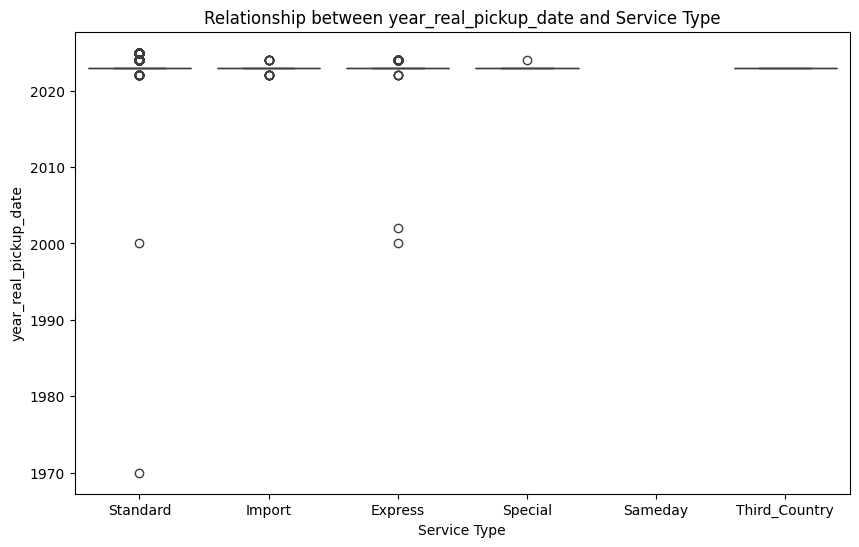

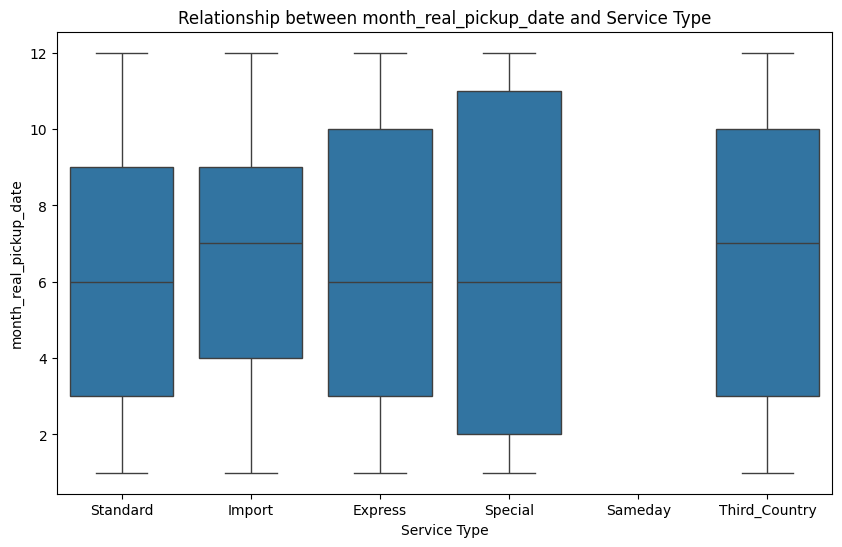

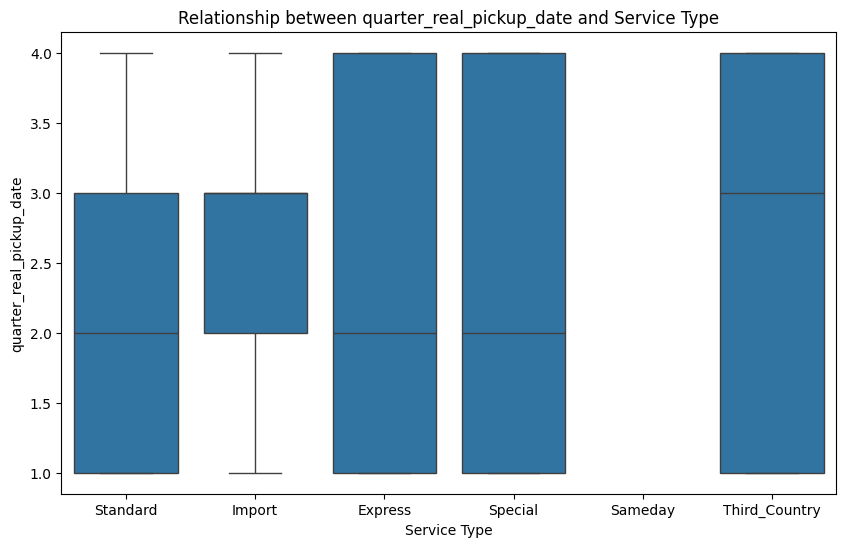

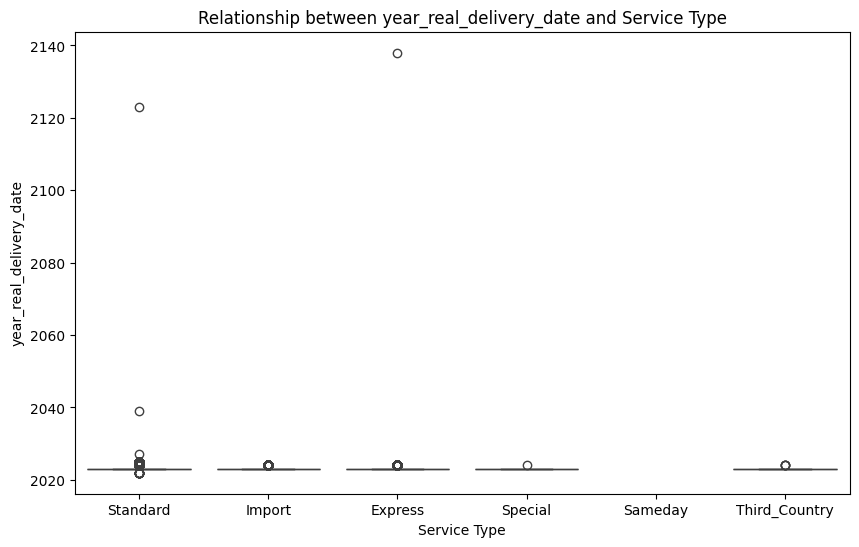

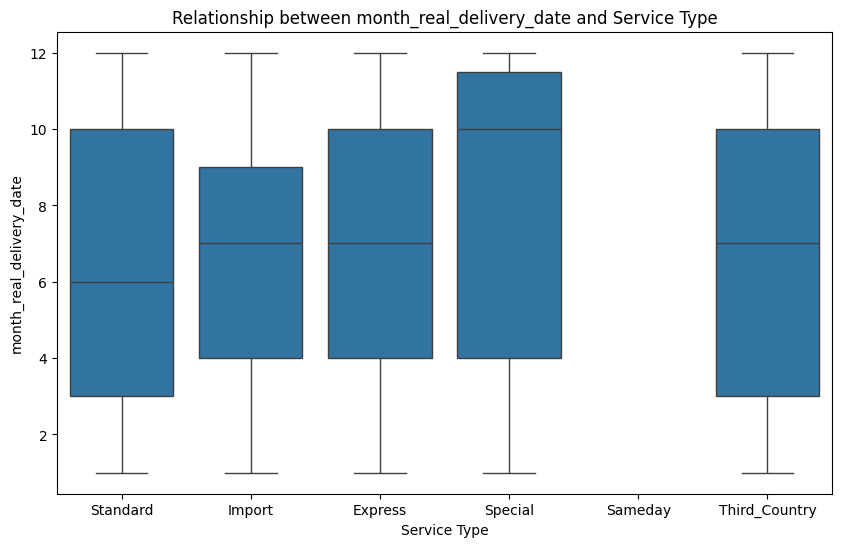

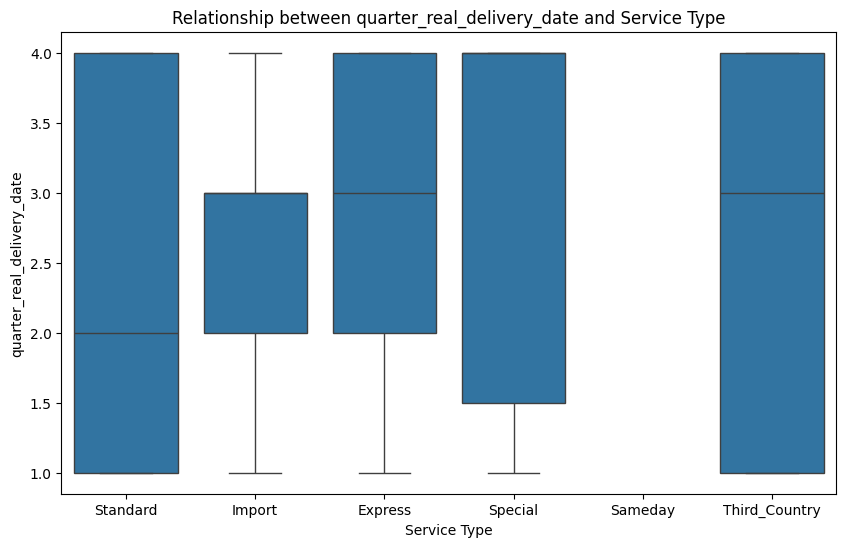

In [25]:
# Box plots to see how numerical features relate to the target variable
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['service_type'], y=df[feature])
    plt.title(f"Relationship between {feature} and Service Type")
    plt.xlabel("Service Type")
    plt.ylabel(feature)
    plt.show()